In [196]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error

In [197]:
data = pd.read_csv('energy.csv')
data.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


In [198]:
countries_to_predict = [
    'Australia', 'Canada', 'China', 'Denmark', 'Germany', 
    'Poland', 'United Arab Emirates', 'United Kingdom', 
    'United States', 'Turkey'
]
data = data[data['Entity'].isin(countries_to_predict)]

In [199]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210 entries, 168 to 3522
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            210 non-null    object 
 1   Year                                                              210 non-null    int64  
 2   Access to electricity (% of population)                           210 non-null    float64
 3   Access to clean fuels for cooking                                 210 non-null    float64
 4   Renewable-electricity-generating-capacity-per-capita              63 non-null     float64
 5   Financial flows to developing countries (US $)                    38 non-null     float64
 6   Renewable energy share in the total final energy consumption (%)  200 non-null    float64
 7   Electricity from fossil fuels (T

In [200]:
# Describe dataset and show missing values
df_info = data.describe().transpose()
missing_values = data.isna().sum()

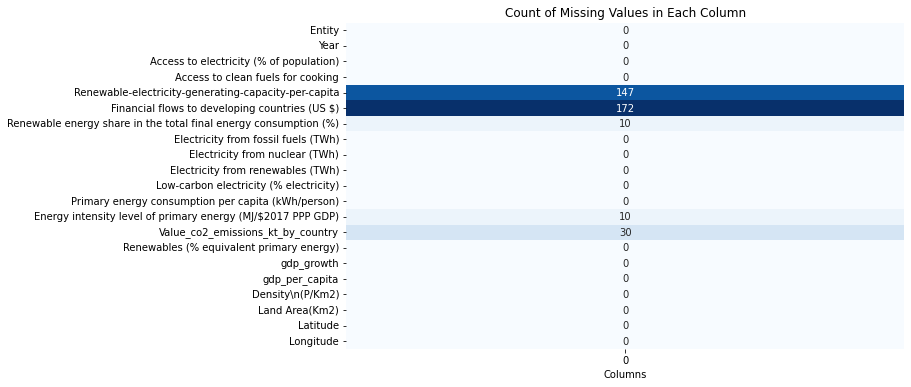

In [201]:
# Create a heatmap to show which columns has the most missing values
fig_missing_values = plt.figure(figsize=(10, 6))
sns.heatmap(missing_values.to_frame(), cmap='Blues', annot=True, fmt='d', cbar=False)
# Customize the chart
plt.title('Count of Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('')
# Display the chart
plt.show()

In [202]:
# Drop columns with a high number of missing values
data.drop(columns=['Financial flows to developing countries (US $)', 'Renewables (% equivalent primary energy)',
                 'Renewable-electricity-generating-capacity-per-capita'], inplace=True)

In [203]:
# Fill missing values with mean
columns_to_fill_mean = ['Access to clean fuels for cooking', 'Renewable energy share in the total final energy consumption (%)',
                        'Electricity from nuclear (TWh)', 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
                        'Value_co2_emissions_kt_by_country', 'gdp_growth', 'gdp_per_capita']
data[columns_to_fill_mean] =data[columns_to_fill_mean].apply(lambda x: x.fillna(x.mean()))

In [204]:
# Drop remaining rows with missing values
data= data.dropna()

In [205]:
# Check for duplicate rows
num_duplicates = data.duplicated().sum()
print("Number of Duplicate Rows:", num_duplicates)

Number of Duplicate Rows: 0


In [206]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210 entries, 168 to 3522
Data columns (total 18 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            210 non-null    object 
 1   Year                                                              210 non-null    int64  
 2   Access to electricity (% of population)                           210 non-null    float64
 3   Access to clean fuels for cooking                                 210 non-null    float64
 4   Renewable energy share in the total final energy consumption (%)  210 non-null    float64
 5   Electricity from fossil fuels (TWh)                               210 non-null    float64
 6   Electricity from nuclear (TWh)                                    210 non-null    float64
 7   Electricity from renewables (TWh

In [207]:
# Reset the index properly
data.reset_index(drop=True, inplace=True)

# Verify the changes
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 18 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            210 non-null    object 
 1   Year                                                              210 non-null    int64  
 2   Access to electricity (% of population)                           210 non-null    float64
 3   Access to clean fuels for cooking                                 210 non-null    float64
 4   Renewable energy share in the total final energy consumption (%)  210 non-null    float64
 5   Electricity from fossil fuels (TWh)                               210 non-null    float64
 6   Electricity from nuclear (TWh)                                    210 non-null    float64
 7   Electricity from renewables (TWh)  

In [220]:
#change the column from continuous to classified based on threshold
# Define the threshold
threshold = 20

# Create a new column with classified values
data['Renewable_energy_classified'] = (data['Renewable energy share in the total final energy consumption (%)'] >= threshold).astype(int)
data.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude,Renewable_energy_classified
0,Australia,2000,100.0,100.0,8.42,181.05,0.0,17.11,8.634437,68632.96,6.16,339450.0000,3.912428,21697.70848,3,7741220.0,-25.274398,133.775136,0
1,Australia,2001,100.0,100.0,8.37,194.33,0.0,17.40,8.218014,68338.28,5.91,345640.0000,2.038301,19527.32358,3,7741220.0,-25.274398,133.775136,0
2,Australia,2002,100.0,100.0,8.74,197.29,0.0,17.35,8.083303,68892.78,5.89,353369.9951,4.014527,20117.78889,3,7741220.0,-25.274398,133.775136,0
3,Australia,2003,100.0,100.0,7.15,195.13,0.0,18.50,8.659832,69082.79,5.78,352579.9866,3.110325,23492.40517,3,7741220.0,-25.274398,133.775136,0
4,Australia,2004,100.0,100.0,6.68,203.66,0.0,19.41,8.701304,70486.32,5.65,365809.9976,4.205447,30513.94174,3,7741220.0,-25.274398,133.775136,0


### FeedForward Neural Network Model

In [242]:
# Exclude data from the year 2020 for training
data_train = data[data['Year'] != 2020]

# Define the target variable for electricity consumption
target = 'Renewable_energy_classified'  # Replace with the actual column name for electricity consumption

# Select numeric columns
selected_features = [
    'Access to electricity (% of population)',
    'Primary energy consumption per capita (kWh/person)',
    'Access to clean fuels for cooking',
    'Electricity from fossil fuels (TWh)',
    'Electricity from nuclear (TWh)',
    'Electricity from renewables (TWh)',
    'Low-carbon electricity (% electricity)',
    'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
    'Value_co2_emissions_kt_by_country',
    'gdp_growth',
    'gdp_per_capita',
    'Land Area(Km2)',
    'Latitude',
    'Longitude'
    
]

In [243]:

X_train = data_train[selected_features]
y_train = data_train[target_electricity]

# Drop rows with missing target values
X_train = X_train.dropna()
y_train =y_train.loc[X.index]

# Feature Importance using RandomForest
forest = RandomForestRegressor(n_estimators=100, random_state=1)
forest.fit(X, y)

RandomForestRegressor(random_state=1)

In [244]:
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
important_features = [selected_features[i] for i in indices]
important_features

['Electricity from renewables (TWh)',
 'Low-carbon electricity (% electricity)',
 'Primary energy consumption per capita (kWh/person)',
 'Electricity from fossil fuels (TWh)',
 'Electricity from nuclear (TWh)',
 'Value_co2_emissions_kt_by_country',
 'gdp_growth',
 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
 'gdp_per_capita',
 'Access to clean fuels for cooking',
 'Access to electricity (% of population)']

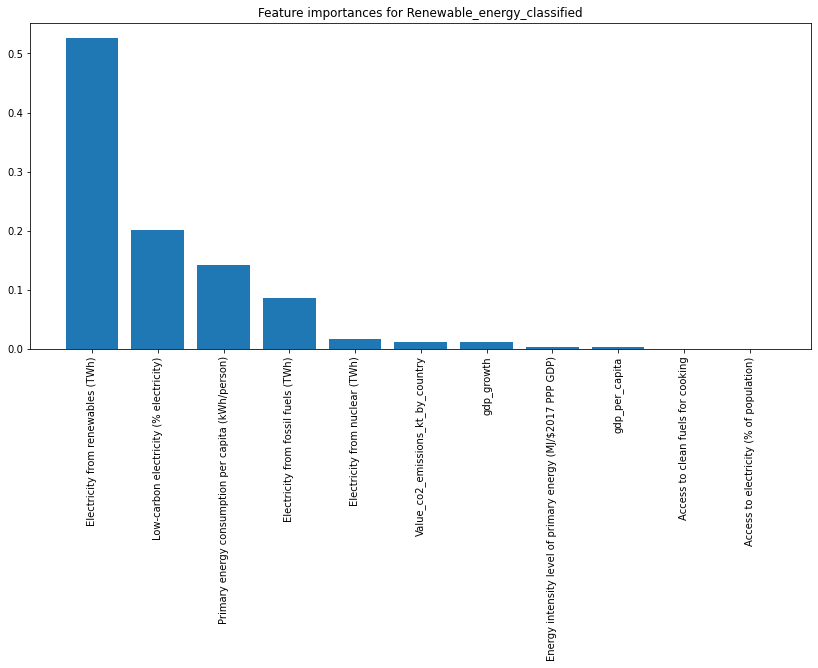

In [245]:
# Plot feature importances
plt.figure(figsize=(14, 6))
plt.title("Feature importances for Renewable_energy_classified")
plt.bar(range(len(important_features)), importances[indices], align="center")
plt.xticks(range(len(important_features)), important_features, rotation=90)
plt.show()

In [246]:
# Select top N features
N = 5  # Number of top features to select
top_features = important_features[:N]
# Prepare data with selected top features
X_selected = X[top_features]

In [247]:
# Function to evaluate the model
def classificationSummary(y_true, y_pred):
    print(confusion_matrix(y_true, y_pred))
    print(classification_report(y_true, y_pred))

# Exclude the year 2020 for training
data_train = data[data['Year'] != 2020]

# Select the features and target variable for training
X_train = data_train[top_features]
y_train = data_train[target]

# Standardize the training data
scaler = StandardScaler()
X_standardized_train = scaler.fit_transform(X_train)

# Split the dataset into training and validation sets
train_X, valid_X, train_y, valid_y = train_test_split(X_standardized_train, y_train, test_size=0.4, random_state=1)

# Experiment with different hidden layer configurations
hidden_layer_configs = [(1,), (2,), (5,), (10,), (20,), (50,), (500,), (1000,)]
best_accuracy = 0
best_config = None

for config in hidden_layer_configs:
    print(f"Training with hidden layer configuration: {config}")
    clf = MLPClassifier(hidden_layer_sizes=config, activation='logistic', solver='lbfgs', random_state=1, max_iter=30000)
    clf.fit(train_X, train_y)
    
    train_pred = clf.predict(train_X)
    valid_pred = clf.predict(valid_X)
    
    train_accuracy = np.mean(train_pred == train_y)
    valid_accuracy = np.mean(valid_pred == valid_y)
    
    print(f"Training accuracy: {train_accuracy:.4f}")
    print(f"Validation accuracy: {valid_accuracy:.4f}")
    
    if valid_accuracy > best_accuracy:
        best_accuracy = valid_accuracy
        best_config = config

print(f"Best hidden layer configuration: {best_config} with accuracy {best_accuracy:.4f}")

# Final evaluation with the best configuration
clf = MLPClassifier(hidden_layer_sizes=best_config, activation='logistic', solver='lbfgs', random_state=1, max_iter=30000)
clf.fit(train_X, train_y)
print("Training performance:")
classificationSummary(train_y, clf.predict(train_X))
print("Validation performance:")
classificationSummary(valid_y, clf.predict(valid_X))


Training with hidden layer configuration: (1,)
Training accuracy: 0.9833
Validation accuracy: 0.8875
Training with hidden layer configuration: (2,)
Training accuracy: 0.9833
Validation accuracy: 0.9125
Training with hidden layer configuration: (5,)
Training accuracy: 0.9833
Validation accuracy: 0.9125
Training with hidden layer configuration: (10,)
Training accuracy: 1.0000
Validation accuracy: 0.9625
Training with hidden layer configuration: (20,)
Training accuracy: 1.0000
Validation accuracy: 0.9625
Training with hidden layer configuration: (50,)
Training accuracy: 1.0000
Validation accuracy: 0.9375
Training with hidden layer configuration: (500,)
Training accuracy: 1.0000
Validation accuracy: 0.9625
Training with hidden layer configuration: (1000,)
Training accuracy: 1.0000
Validation accuracy: 0.9500
Best hidden layer configuration: (10,) with accuracy 0.9625
Training performance:
[[60  0]
 [ 0 60]]
              precision    recall  f1-score   support

           0       1.00     

In [254]:
print('Intercepts')
print(clf.intercepts_)


Intercepts
[array([-1.3184913 , -0.65917753, -6.19569847, -1.72672934,  1.25950702,
       -6.15035427, -2.44382414, -4.35674086,  0.91106166,  1.06424787]), array([11.16148656])]


In [255]:
print('Weights')
print(clf.coefs_)


Weights
[array([[ -7.35412697,  -7.29931638,  -2.06215905,  -0.11641644,
        -10.51657964,  -6.68153722,   2.17833374,  10.80736952,
          5.77048144, -10.49246541],
       [-15.3895377 ,  -8.9370304 ,   4.29810847,  -4.19534714,
        -11.69171656,  -6.17064103,   4.43842368,  -0.9905508 ,
          9.55288436,  -9.97027934],
       [  7.34499596,  -0.06881357,  -8.06220257,   4.79826193,
          8.57750107, -10.44208605,  -2.20099942,  -0.30053601,
         -7.80080595,  -8.93861668],
       [  7.35492555,   0.41993209,  -0.21703945,   0.5003565 ,
          5.15103118,  -3.44981612,  -0.70729265,  -3.83173793,
         -3.17199929,  -1.01981957],
       [ 17.31035204,   4.32518337,  -4.09709746,   1.03973648,
         20.49525188,  -7.09427688,  -4.3158259 , -21.0832168 ,
        -10.47344335,   4.39185311]]), array([[-15.28818047],
       [ -3.86780592],
       [ -9.20597559],
       [ -0.97974558],
       [-19.19173761],
       [ -8.98467453],
       [ -4.46921928],
   

In [263]:
# Prediction on old data for 2020
data_2020 = data[data['Year'] == 2020]

# Extract features from the 2020 data
X_2020 = data_2020[top_features]

# Standardize the 2020 data using the scaler fitted on the training data
X_2020_standardized = scaler.transform(X_2020)

# Make predictions
predictions_proba = clf.predict_proba(X_2020_standardized)

# Reset the index of data_2020 to ensure proper alignment
data_2020 = data_2020.reset_index(drop=True)

# Combine the original data with the prediction probabilities
result = pd.concat([
    data_2020,
    pd.DataFrame(predictions_proba, columns=['Prob_0', 'Prob_1'])
], axis=1)

# Print the result
print(result)

                 Entity  Year  Access to electricity (% of population)  \
0             Australia  2020                                    100.0   
1                Canada  2020                                    100.0   
2                 China  2020                                    100.0   
3               Denmark  2020                                    100.0   
4               Germany  2020                                    100.0   
5                Poland  2020                                    100.0   
6                Turkey  2020                                    100.0   
7  United Arab Emirates  2020                                    100.0   
8        United Kingdom  2020                                    100.0   
9         United States  2020                                    100.0   

   Access to clean fuels for cooking  \
0                              100.0   
1                              100.0   
2                               79.4   
3                        

In [267]:
# Prediction on old data for 2020
data_2020 = data[data['Year'] == 2020]

# Extract features from the 2020 data
X_2020 = data_2020[top_features]

# Standardize the 2020 data using the scaler fitted on the training data
X_2020_standardized = scaler.transform(X_2020)

# Make predictions for the 2020 data
data_2020['Renewable_energy_prediction'] =clf.predict(X_2020_standardized)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_22188\75076784.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2020['Renewable_energy_prediction'] =clf.predict(X_2020_standardized)


In [268]:
data_2020

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude,Renewable_energy_classified,Renewable_energy_prediction
20,Australia,2020,100.0,100.0,11.5675,186.92,0.00,63.99,25.503168,61826.210,4.91275,1.736764e+06,-0.003837,51692.84275,3,7741220.0,-25.274398,133.775136,1,1
41,Canada,2020,100.0,100.0,11.5675,102.19,92.65,429.24,83.625496,100497.280,4.91275,1.736764e+06,-5.233024,43294.64816,4,9984670.0,56.130366,-106.346771,1,1
62,China,2020,100.0,79.4,11.5675,5184.13,366.20,2184.94,32.980618,29133.936,4.91275,1.736764e+06,2.347514,10434.77519,153,9596960.0,35.861660,104.195397,1,1
83,Denmark,2020,100.0,100.0,11.5675,5.28,0.00,23.45,81.622000,29380.422,4.91275,1.736764e+06,-2.062125,61063.31643,137,43094.0,56.263920,9.501785,1,1
104,Germany,2020,100.0,100.0,11.5675,251.40,64.38,251.48,55.681694,41377.680,4.91275,1.736764e+06,-4.569617,46208.42947,240,357022.0,51.165691,10.451526,1,1
125,Poland,2020,100.0,100.0,11.5675,128.91,0.00,28.23,17.964872,29514.133,4.91275,1.736764e+06,-2.540659,15720.99466,124,312685.0,51.919438,19.145136,1,1
146,Turkey,2020,100.0,95.2,11.5675,177.08,0.00,128.34,42.020820,21435.070,4.91275,1.736764e+06,1.793551,8536.43332,110,783562.0,38.963745,35.243322,1,1
167,United Arab Emirates,2020,100.0,100.0,11.5675,119.49,1.56,5.50,5.578823,126073.660,4.91275,1.736764e+06,-6.134501,36284.55524,118,83600.0,23.424076,53.847818,1,0
188,United Kingdom,2020,100.0,100.0,11.5675,124.78,50.85,131.74,59.403976,29425.540,4.91275,1.736764e+06,-9.396160,41059.16881,281,243610.0,55.378051,-3.435973,1,1
209,United States,2020,100.0,100.0,11.5675,2431.90,789.88,821.40,39.851800,73236.140,4.91275,1.736764e+06,-3.404592,63593.44362,36,9833517.0,37.090240,-95.712891,1,0


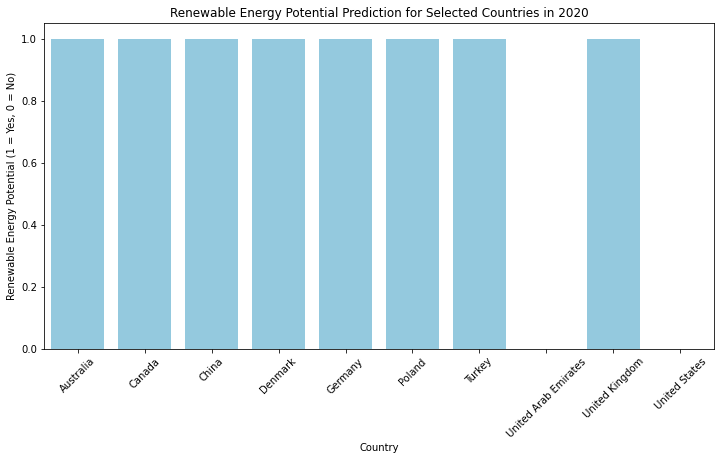

In [270]:
# Plot the predictions for 2020
plt.figure(figsize=(12, 6))
sns.barplot(x='Entity', y='Renewable_energy_prediction', data=data_2020, color='skyblue')
plt.title('Renewable Energy Potential Prediction for Selected Countries in 2020')
plt.xlabel('Country')
plt.ylabel('Renewable Energy Potential (1 = Yes, 0 = No)')
plt.xticks(rotation=45)
plt.show()

### Exploratory Data Analysis

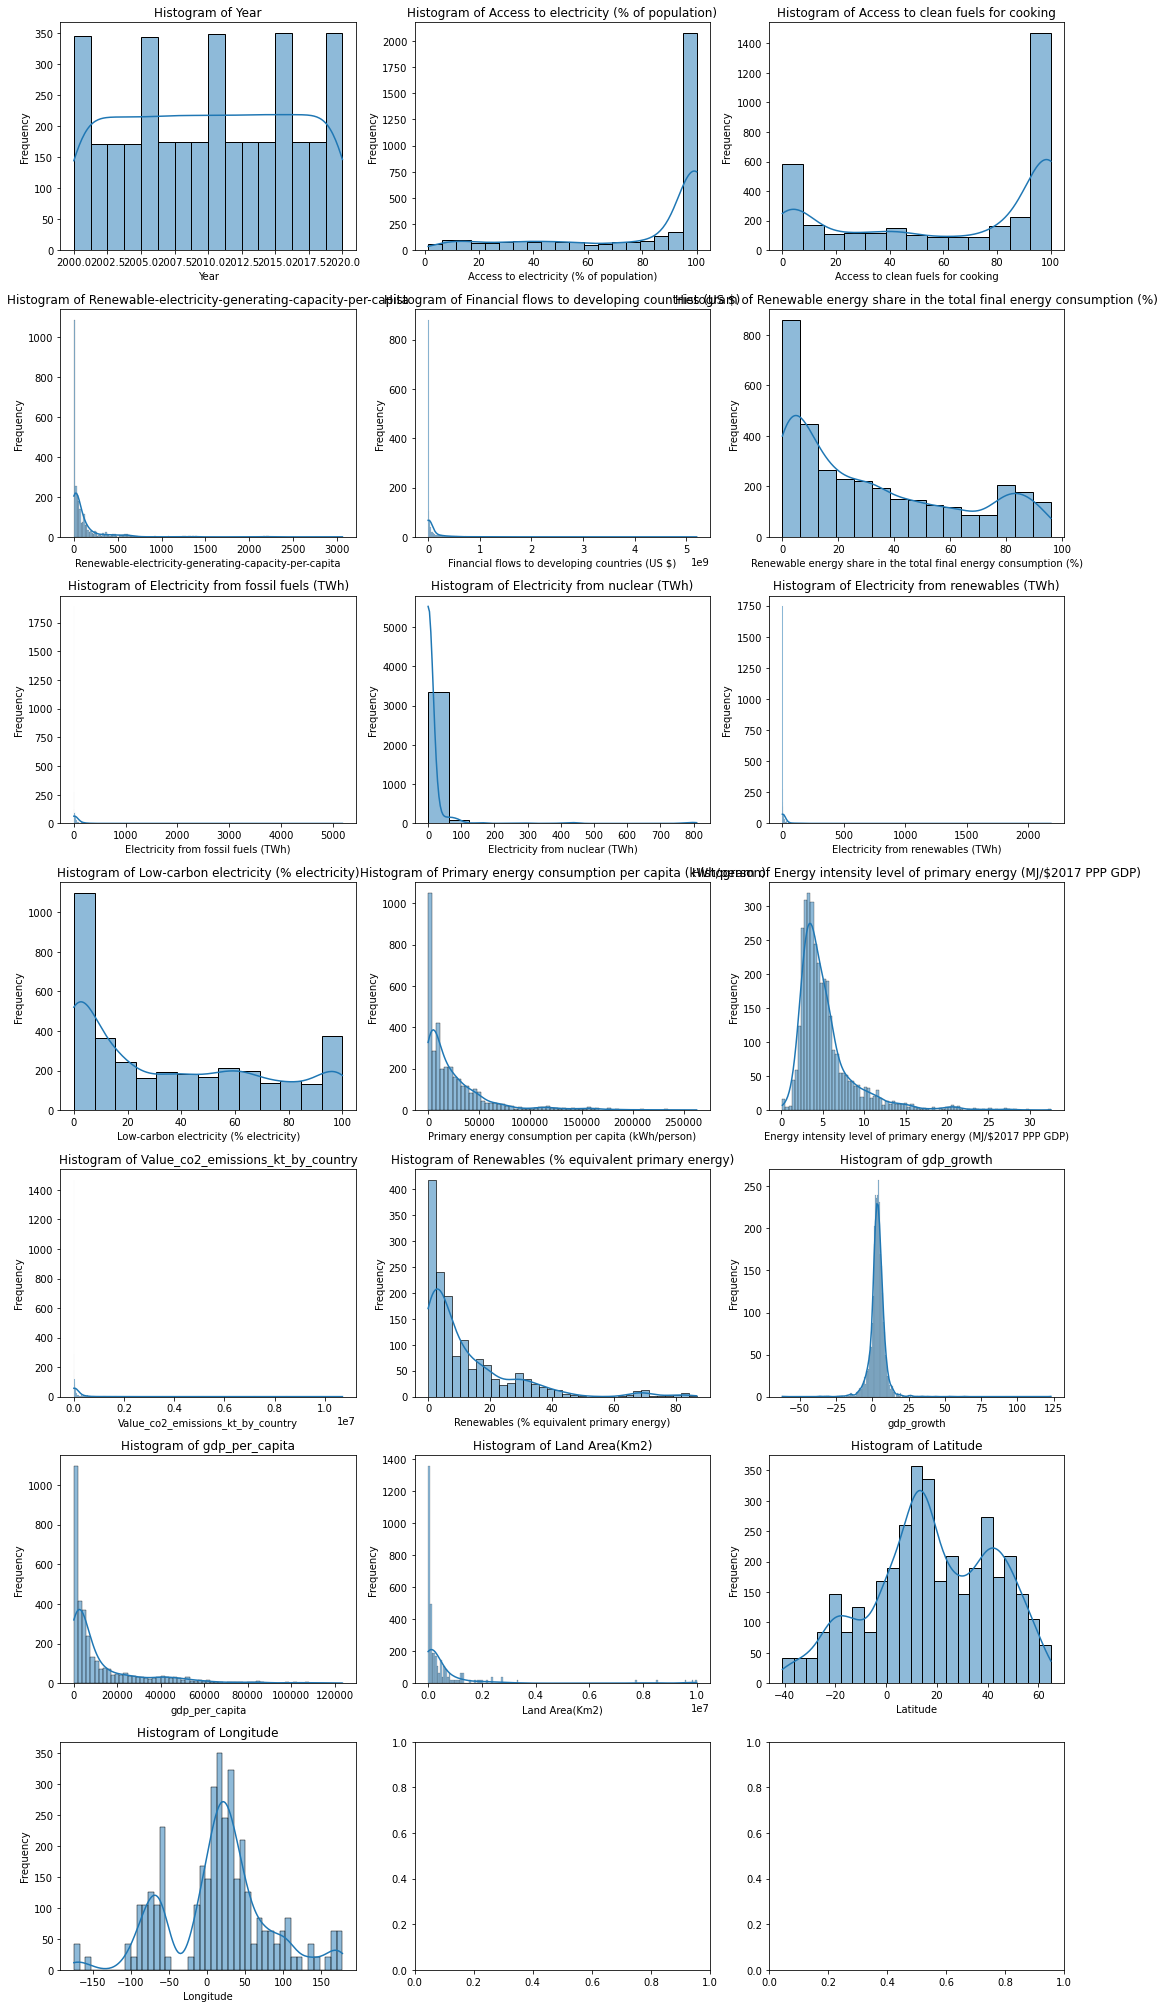

In [271]:
df= pd.read_csv('energy.csv')
# Drop non-numeric columns for simplicity in this example
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Set up subplots
fig, axes = plt.subplots(nrows=len(numeric_columns) // 3 + 1, ncols=3, figsize=(15, 4 * (len(numeric_columns) // 3 + 1)))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Plot histograms for each numeric column
for i, column in enumerate(numeric_columns):
    sns.histplot(df[column], ax=axes[i], kde=True)
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

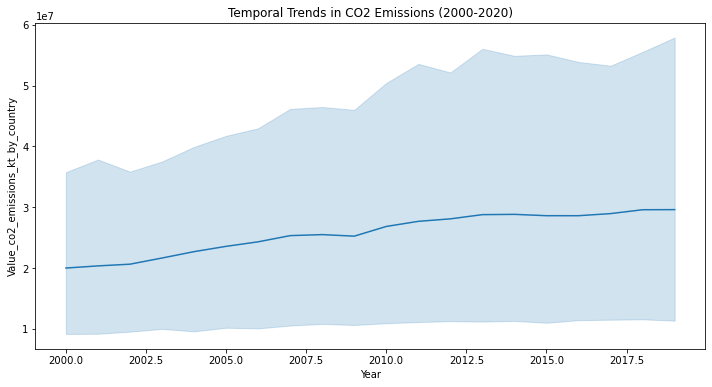

In [272]:
# Temporal Trends in Co2 Emmissions
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Value_co2_emissions_kt_by_country', data=df, estimator='sum')
plt.title('Temporal Trends in CO2 Emissions (2000-2020)')
plt.show()

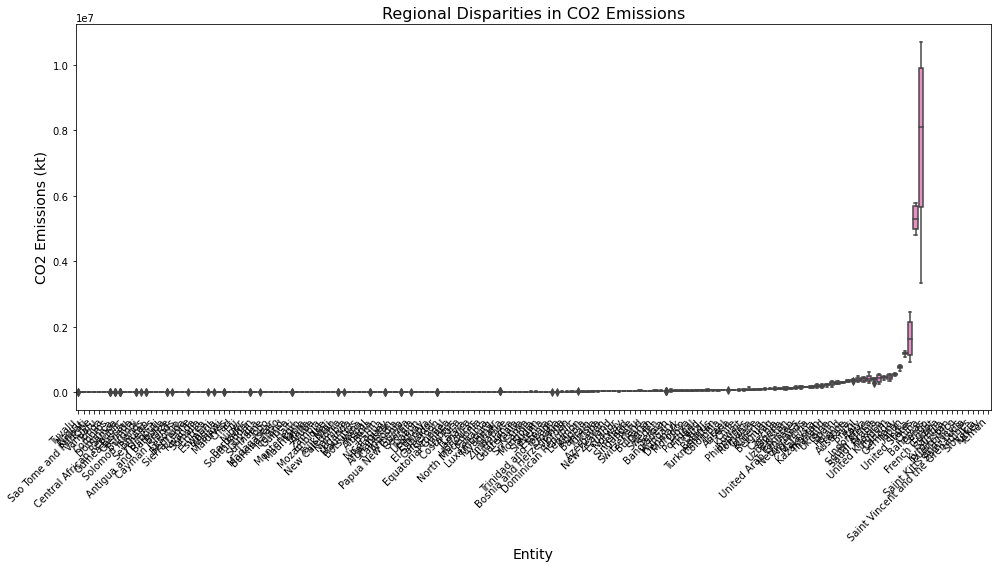

In [273]:
# Regional Disparities
plt.figure(figsize=(14, 8))  
sns.boxplot(x='Entity', y='Value_co2_emissions_kt_by_country', data=df, order=df.groupby('Entity')['Value_co2_emissions_kt_by_country'].median().sort_values().index)  # Sort by median

plt.title('Regional Disparities in CO2 Emissions', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate and adjust font size of x-axis labels
plt.xlabel('Entity', fontsize=14)  # Label x-axis
plt.ylabel('CO2 Emissions (kt)', fontsize=14)  # Label y-axis
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

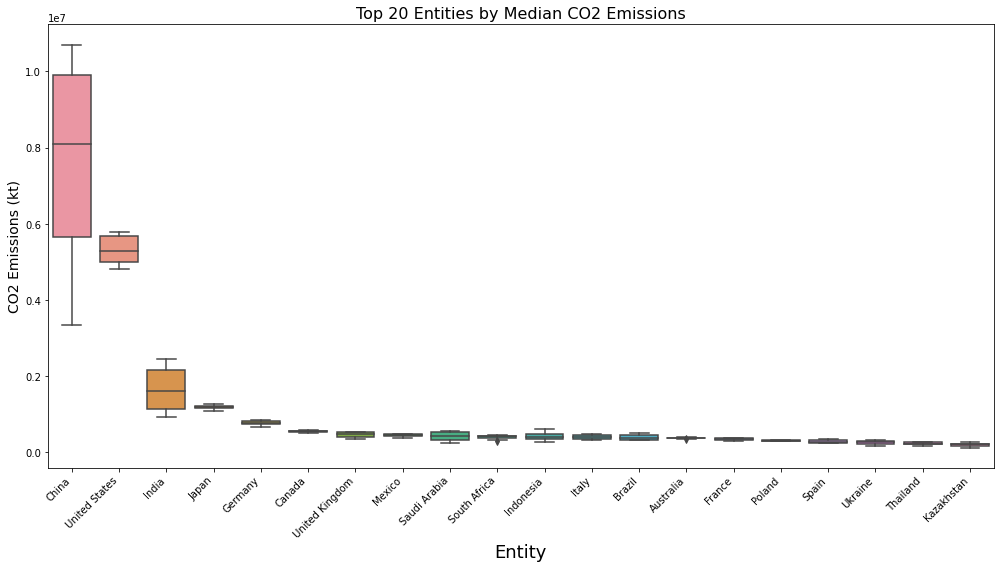

In [274]:
# Calculate the median CO2 emissions for each entity
median_values = df.groupby('Entity')['Value_co2_emissions_kt_by_country'].median()

# Select the top 20 entities with the highest median CO2 emissions
top_20_entities = median_values.nlargest(20).index

# Filter the DataFrame to include only the top 20 entities
df_top_20 = df[df['Entity'].isin(top_20_entities)]

# Plot the boxplot for the top 20 entities
plt.figure(figsize=(14, 8))
sns.boxplot(x='Entity', y='Value_co2_emissions_kt_by_country', data=df_top_20, order=top_20_entities)

plt.title('Top 20 Entities by Median CO2 Emissions', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.xlabel('Entity', fontsize=18)
plt.ylabel('CO2 Emissions (kt)', fontsize=14)
plt.tight_layout()
plt.show()

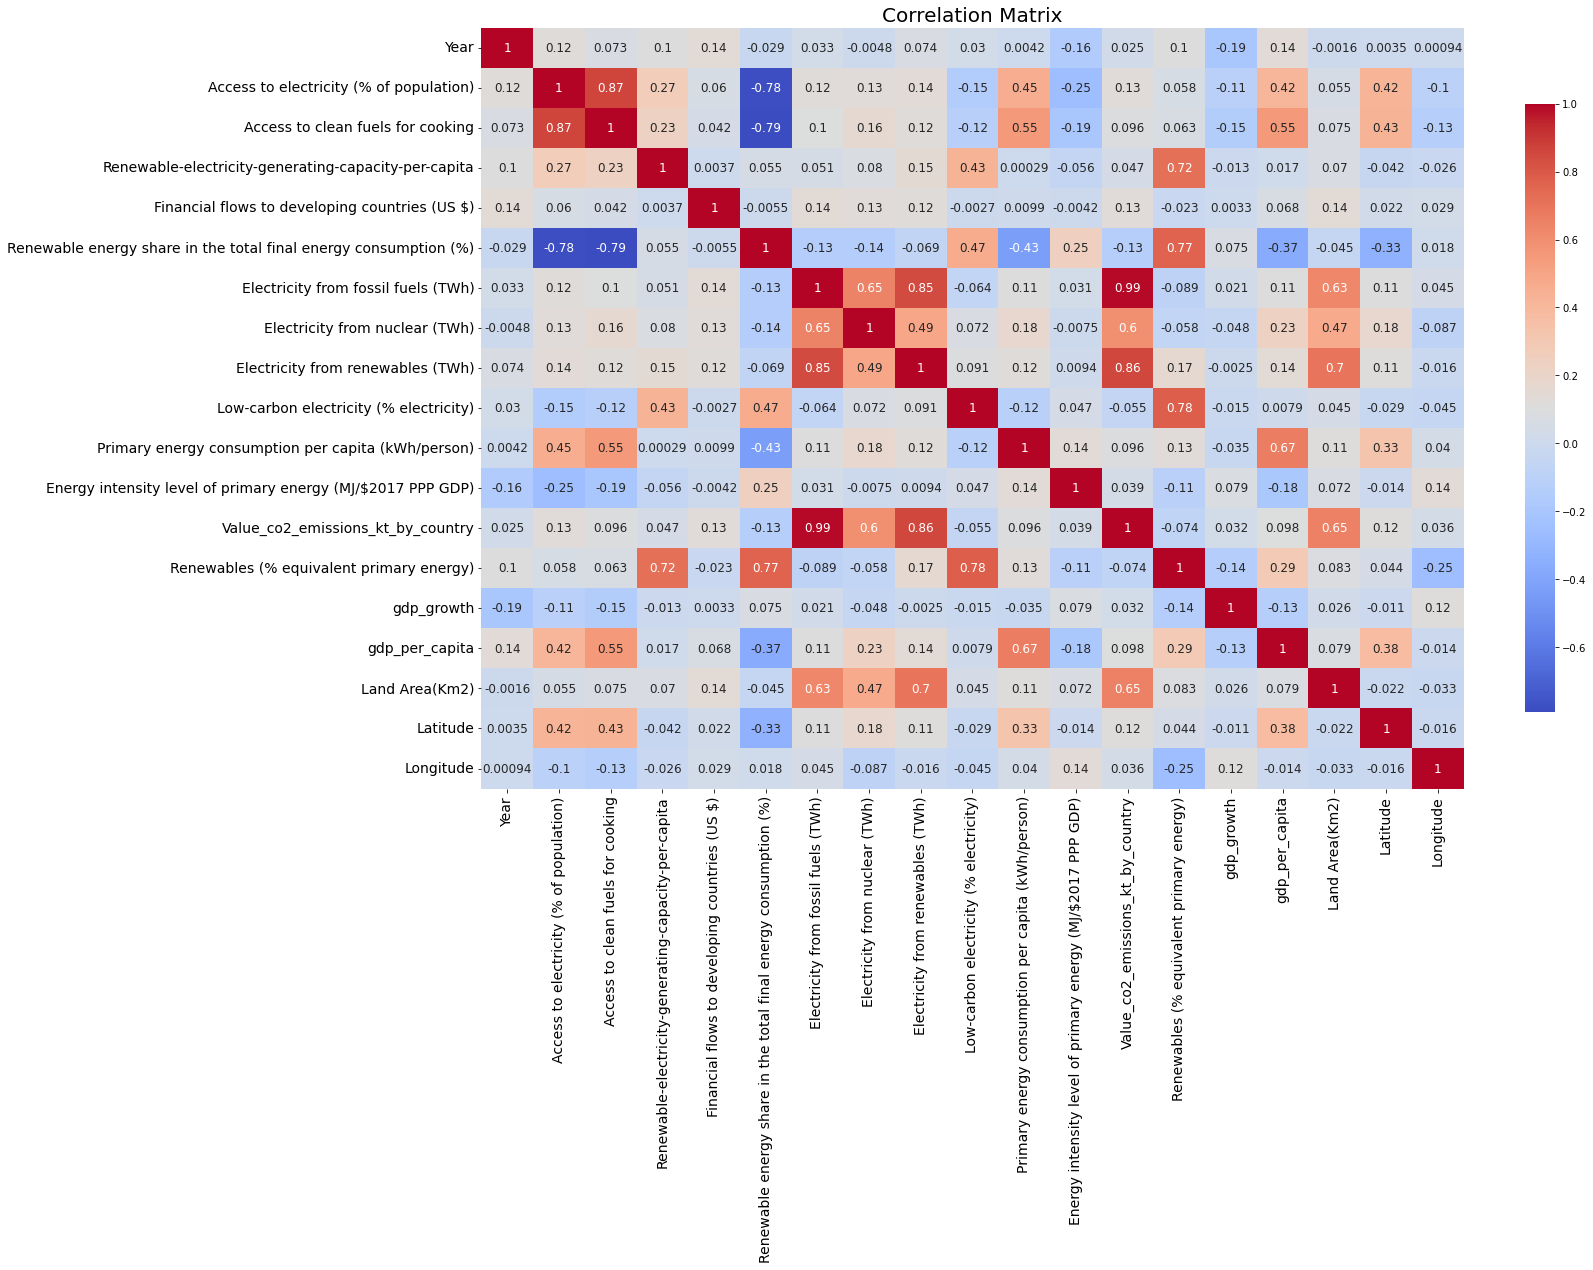

In [275]:
# Correlation Analysis
correlation_matrix = df.corr()
plt.figure(figsize=(22, 14))

# Adjust the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', annot_kws={"size": 12}, cbar_kws={"shrink": 0.8})  # Increase annotation font size and adjust color bar size

# Adjust the font size of x and y axis labels
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.title('Correlation Matrix', fontsize=20)  # Increase the title font size
plt.show()

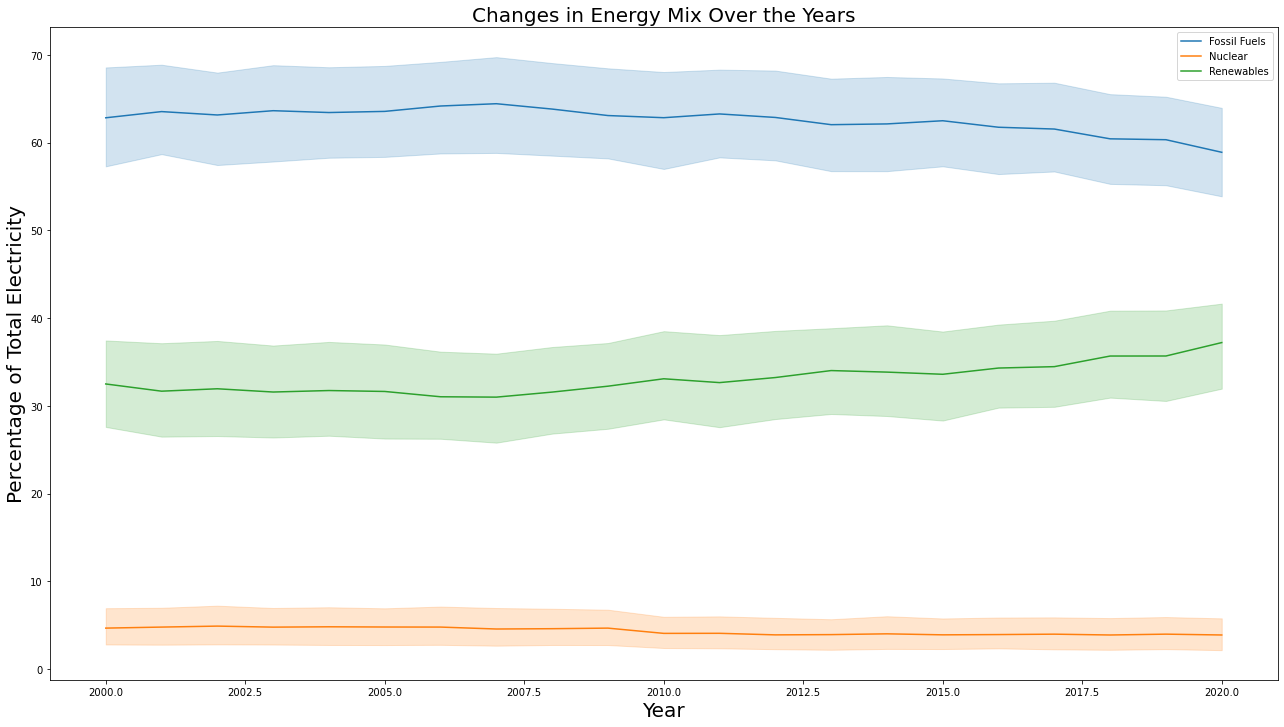

Countries that have successfully transitioned to a higher percentage of renewable energy:
         Entity  Year  Renewables (%)
357      Belize  2000       50.000000
2472     Norway  2000       99.775328
1366  Guatemala  2000       52.902156
903     Denmark  2000       15.472222
2430    Nigeria  2000       40.282686
...         ...   ...             ...
3459    Ukraine  2020       11.844058
2660     Poland  2020       17.964872
3207     Sweden  2020       68.471824
881      Cyprus  2020       12.371134
566     Burundi  2020       68.571429

[1514 rows x 3 columns]


In [276]:
# Create a new column for the total electricity generation
df['Total Electricity (TWh)'] = df['Electricity from fossil fuels (TWh)'] + df['Electricity from nuclear (TWh)'] + df['Electricity from renewables (TWh)']

# Calculate the percentage contribution of each energy source
df['Fossil Fuels (%)'] = (df['Electricity from fossil fuels (TWh)'] / df['Total Electricity (TWh)']) * 100
df['Nuclear (%)'] = (df['Electricity from nuclear (TWh)'] / df['Total Electricity (TWh)']) * 100
df['Renewables (%)'] = (df['Electricity from renewables (TWh)'] / df['Total Electricity (TWh)']) * 100

# Plot the changes in the energy mix over the years
plt.figure(figsize=(22, 12))
sns.lineplot(x='Year', y='Fossil Fuels (%)', label='Fossil Fuels', data=df)
sns.lineplot(x='Year', y='Nuclear (%)', label='Nuclear', data=df)
sns.lineplot(x='Year', y='Renewables (%)', label='Renewables', data=df)
plt.title('Changes in Energy Mix Over the Years', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Percentage of Total Electricity', fontsize=20)
plt.legend()
plt.show()

# Identify countries that have transitioned to a higher percentage of renewable energy
transitioned_countries = df[df['Renewables (%)'] > df['Renewables (%)'].shift(1)].sort_values('Year')

# Display the countries that have successfully transitioned
print('Countries that have successfully transitioned to a higher percentage of renewable energy:')
print(transitioned_countries[['Entity', 'Year', 'Renewables (%)']])

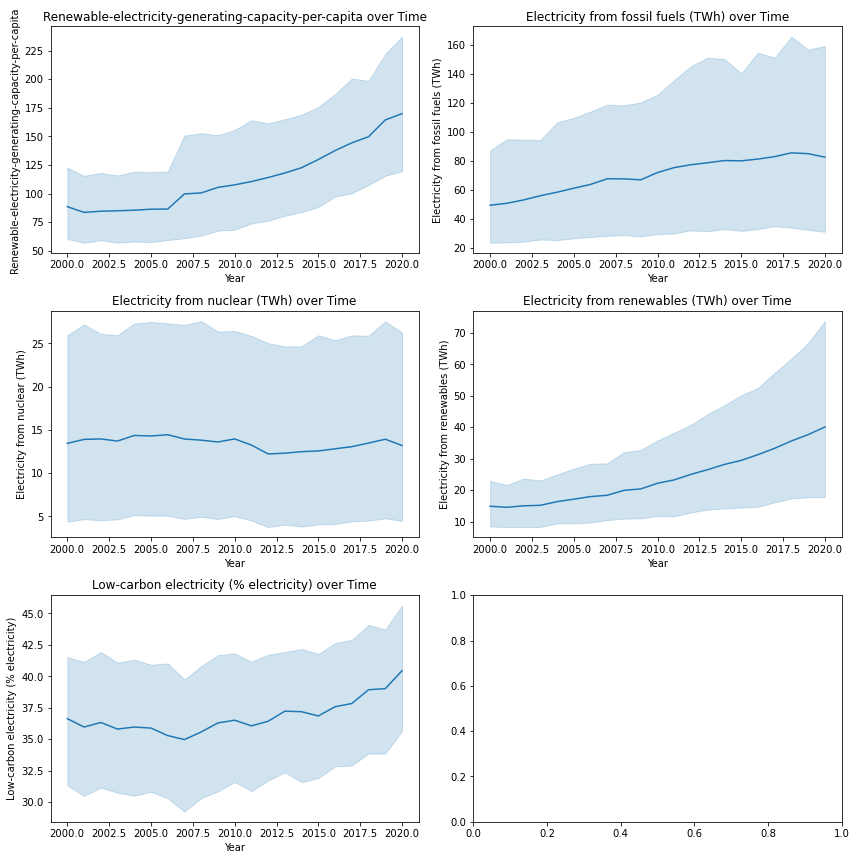

In [277]:
# Drop non-energy variables and 'Area', 'Density', 'Latitude', 'Longitude'
energy_columns = [
                   'Renewable-electricity-generating-capacity-per-capita',
                   'Electricity from fossil fuels (TWh)',
                   'Electricity from nuclear (TWh)',
                   'Electricity from renewables (TWh)',
                   'Low-carbon electricity (% electricity)',
                   ]

df_energy = df[energy_columns + ['Year']]

# Set up subplots
fig, axes = plt.subplots(nrows=len(energy_columns) // 2 + 1, ncols=2, figsize=(12, 4 * (len(energy_columns) // 2 + 1)))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Plot line graphs for each energy variable against 'Year'
for i, column in enumerate(energy_columns):
    sns.lineplot(x='Year', y=column, data=df_energy, ax=axes[i])
    axes[i].set_title(f'{column} over Time')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel(column)

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

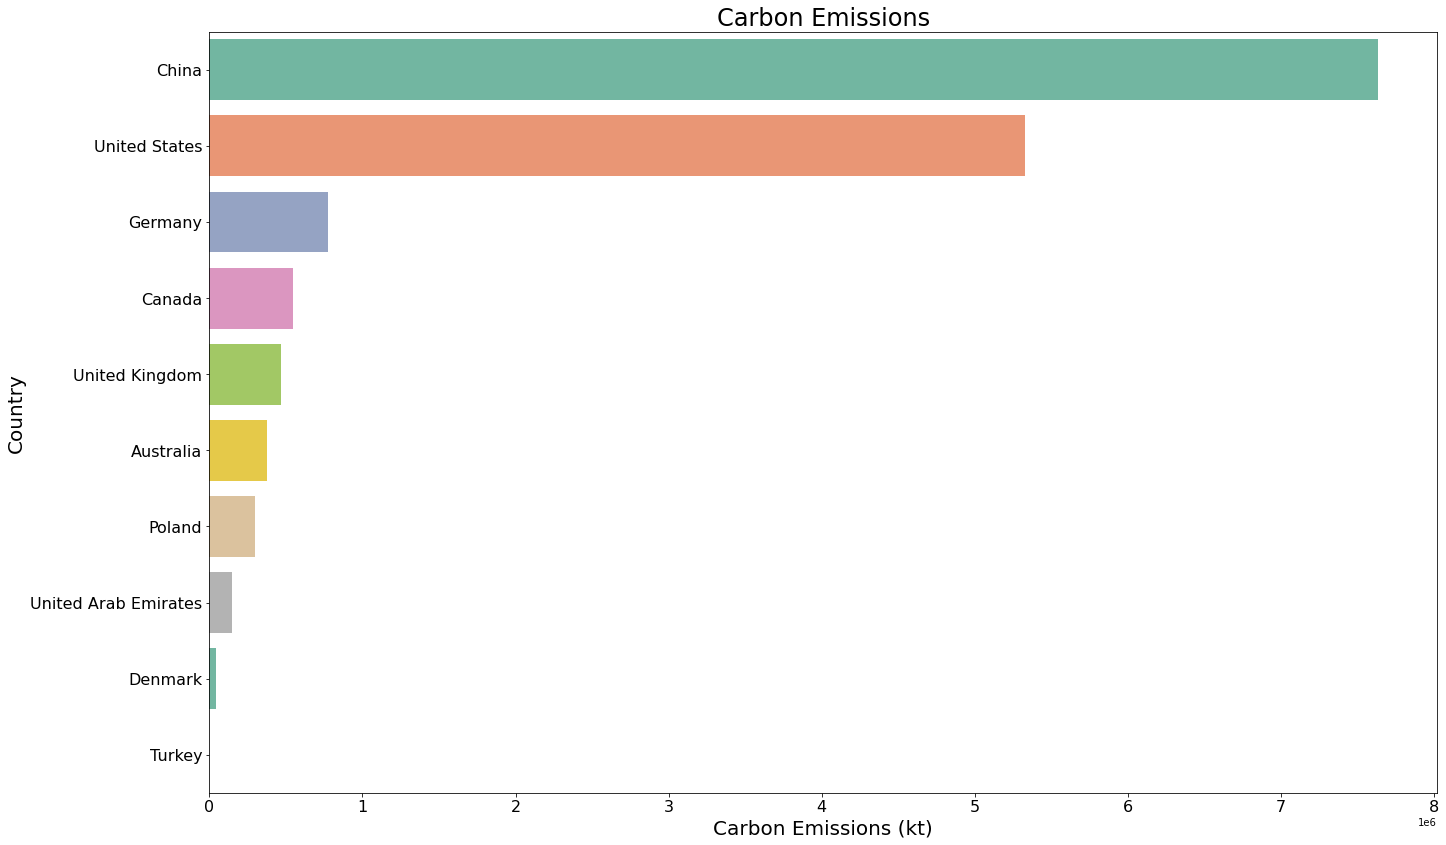

In [278]:
# Filter the data for the specified countries
selected_countries = ['Australia', 'Canada', 'China', 'Denmark', 'Germany', 'Poland', 'United Arab Emirates', 'United Kingdom', 'United States', 'Turkey']

selected_data = df[df['Entity'].isin(selected_countries)]

# Calculate the mean CO2 emissions and sort countries by this value
country_order = selected_data.groupby('Entity')['Value_co2_emissions_kt_by_country'].mean().sort_values(ascending=False).index

# Plot bar chart for carbon emissions in selected countries
plt.figure(figsize=(22, 14))
sns.barplot(x='Value_co2_emissions_kt_by_country', y='Entity', data=selected_data, order=country_order, palette='Set2', ci=None)

# Set title and labels with larger font size
plt.title('Carbon Emissions', fontsize=24)
plt.xlabel('Carbon Emissions (kt)', fontsize=20)
plt.ylabel('Country', fontsize=20)

# Adjust the font size of tick labels
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.show()

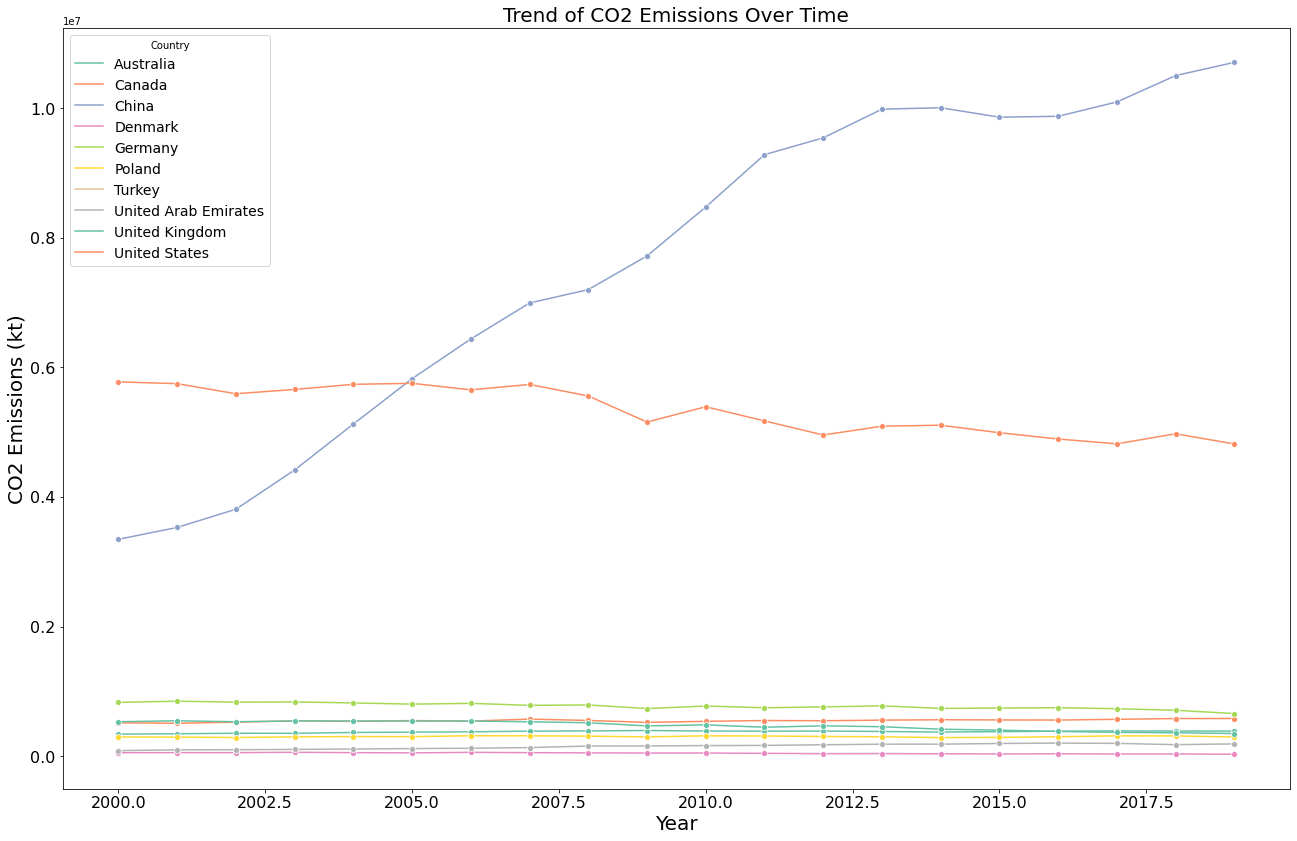

In [279]:
# Filter the data for the specified countries
selected_countries = ['Australia', 'Canada', 'China', 'Denmark', 'Germany', 'Poland', 'United Arab Emirates', 'United Kingdom', 'United States', 'Turkey']
selected_data = df[df['Entity'].isin(selected_countries)]

# Create line plots for CO2 emissions over time
plt.figure(figsize=(22, 14))
sns.lineplot(x='Year', y='Value_co2_emissions_kt_by_country', hue='Entity', palette='Set2' ,data=selected_data, marker='o')
plt.title('Trend of CO2 Emissions Over Time', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.ylabel('CO2 Emissions (kt)', fontsize=20)
plt.legend(title='Country', fontsize=14)
# Adjust the font size of tick labels
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.show()

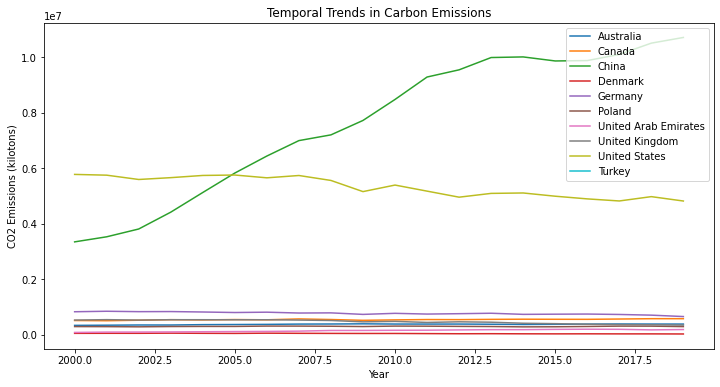

In [280]:
# new set of countries
brics_countries = ['Australia', 'Canada', 'China', 'Denmark', 'Germany', 'Poland', 'United Arab Emirates', 'United Kingdom', 'United States', 'Turkey']

# Filter the data for BRICS countries
brics_df = df[df['Entity'].isin(brics_countries)]

# Basic Descriptive Statistics
brics_descriptive_stats = brics_df.describe()

# Temporal Trends: Carbon Emissions
plt.figure(figsize=(12, 6))
for country in brics_countries:
    sns.lineplot(x='Year', y='Value_co2_emissions_kt_by_country', data=brics_df[brics_df['Entity'] == country], label=country)

plt.title('Temporal Trends in Carbon Emissions')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (kilotons)')
plt.legend()
plt.show()

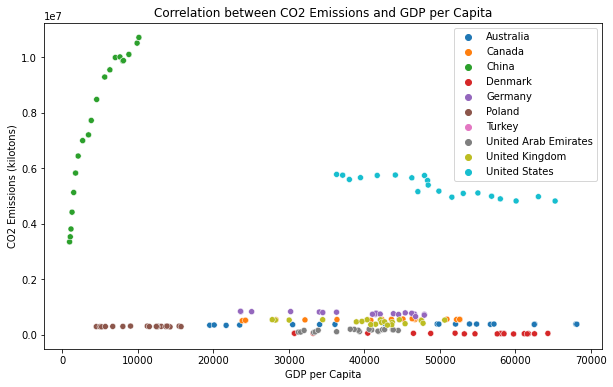

In [281]:
# Correlation Analysis: CO2 Emissions vs. GDP
plt.figure(figsize=(10, 6))
sns.scatterplot(x='gdp_per_capita', y='Value_co2_emissions_kt_by_country', hue='Entity', data=brics_df)
plt.title('Correlation between CO2 Emissions and GDP per Capita')
plt.xlabel('GDP per Capita')
plt.ylabel('CO2 Emissions (kilotons)')
plt.legend()
plt.show()

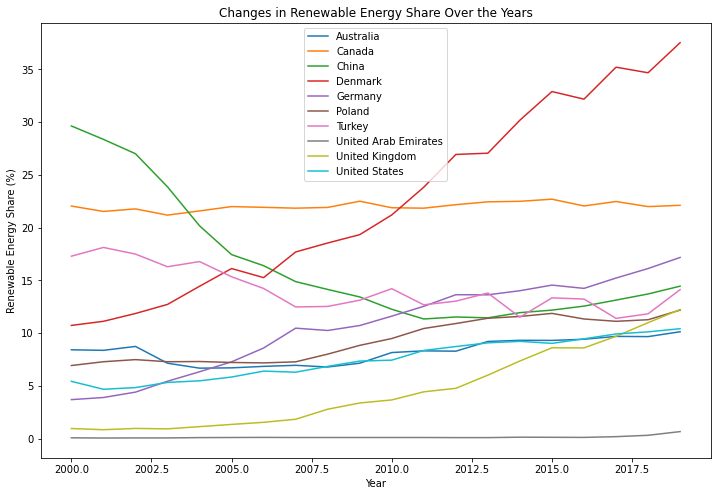

In [282]:
# Energy Mix Changes Over the Years
plt.figure(figsize=(12, 8))
sns.lineplot(x='Year', y='Renewable energy share in the total final energy consumption (%)', hue='Entity', data=brics_df)
plt.title('Changes in Renewable Energy Share Over the Years')
plt.xlabel('Year')
plt.ylabel('Renewable Energy Share (%)')
plt.legend()
plt.show()

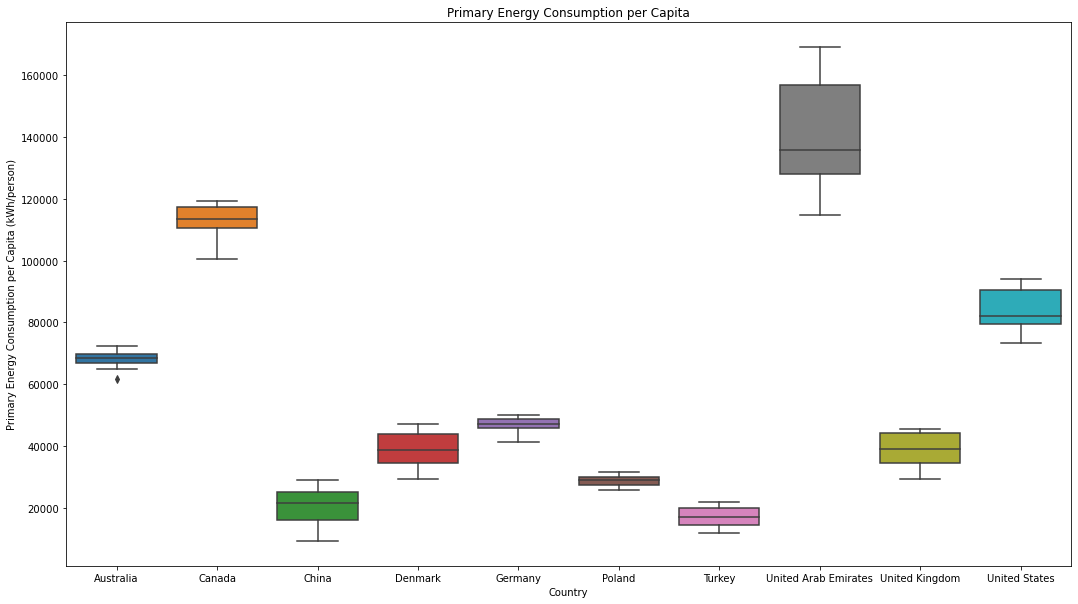

In [284]:
# Boxplot: Primary Energy Consumption per Capita
plt.figure(figsize=(18, 10))
sns.boxplot(x='Entity', y='Primary energy consumption per capita (kWh/person)', data=brics_df)
plt.title('Primary Energy Consumption per Capita')
plt.xlabel('Country')
plt.ylabel('Primary Energy Consumption per Capita (kWh/person)')
plt.show()

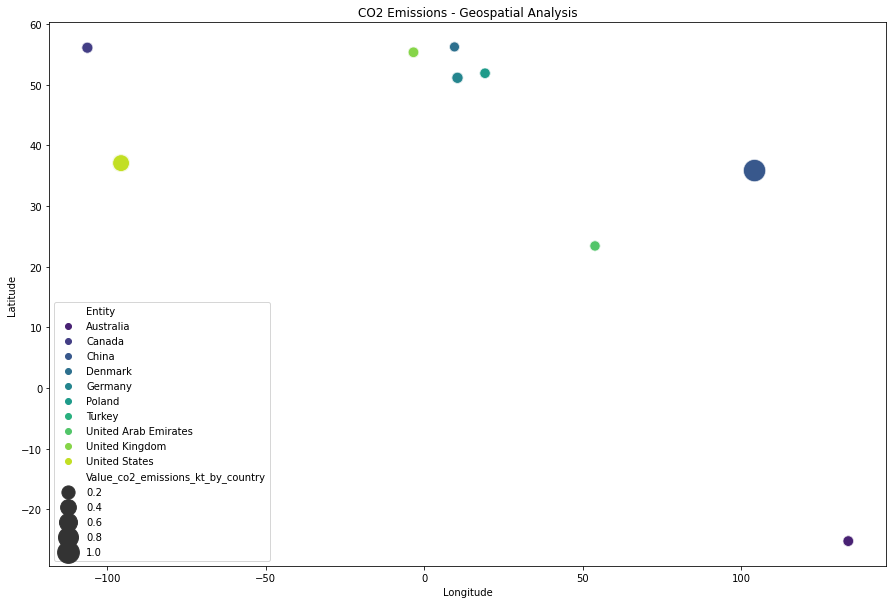

In [285]:
# Geospatial Analysis: CO2 Emissions Map
plt.figure(figsize=(15, 10))
sns.scatterplot(x='Longitude', y='Latitude', size='Value_co2_emissions_kt_by_country', hue='Entity', data=brics_df, sizes=(100, 500), palette='viridis', alpha=0.7)
plt.title('CO2 Emissions - Geospatial Analysis')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

### Predicting energy consumption for the years 2021-2025 for each country

In [286]:
#ARIMA


from statsmodels.tsa.arima.model import ARIMA

# the list of countries
countries = ['Australia', 'Canada', 'China', 'Denmark', 'Germany', 'Poland', 'United Arab Emirates', 'United Kingdom', 'United States', 'Turkey']


# filtering the data for Turkey, India, and China
filtered_data = df[df['Entity'].isin(countries)]

# Function to manually fit an ARIMA model and forecast
def manual_arima_forecast(country_data, order=(1, 1, 1)):
    # Extract the energy consumption column
    energy_consumption = country_data['Primary energy consumption per capita (kWh/person)'].dropna()

    # Fit ARIMA model
    model = ARIMA(energy_consumption, order=order)
    model_fit = model.fit()

    # Forecast for the next 5 years (2021-2025)
    forecast = model_fit.forecast(steps=5)

    return forecast, model_fit

# Forecasting for each country
manual_results = {}
for country in countries:
    country_data = filtered_data[filtered_data['Entity'] == country].sort_values('Year')
    forecast, model_fit = manual_arima_forecast(country_data)
    manual_results[country] = {
        'forecast': forecast,
        'model_summary': model_fit.summary()
    }

# Display the forecasted values and model summary for each country
for country, result in manual_results.items():
    print(f"Forecast for {country}:")
    print(result['forecast'])
    print("Model Summary:")
    print(result['model_summary'])
    print("\n" + "="*50 + "\n")

C:\Users\ASUS\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\ASUS\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g

Forecast for Australia:
21    61903.434609
22    61842.880874
23    61890.362563
24    61853.130990
25    61882.325192
Name: predicted_mean, dtype: float64
Model Summary:
                                               SARIMAX Results                                                
Dep. Variable:     Primary energy consumption per capita (kWh/person)   No. Observations:                   21
Model:                                                 ARIMA(1, 1, 1)   Log Likelihood                -174.185
Date:                                                Tue, 13 Aug 2024   AIC                            354.371
Time:                                                        16:01:55   BIC                            357.358
Sample:                                                             0   HQIC                           354.954
                                                                 - 21                                         
Covariance Type:                                    

C:\Users\ASUS\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


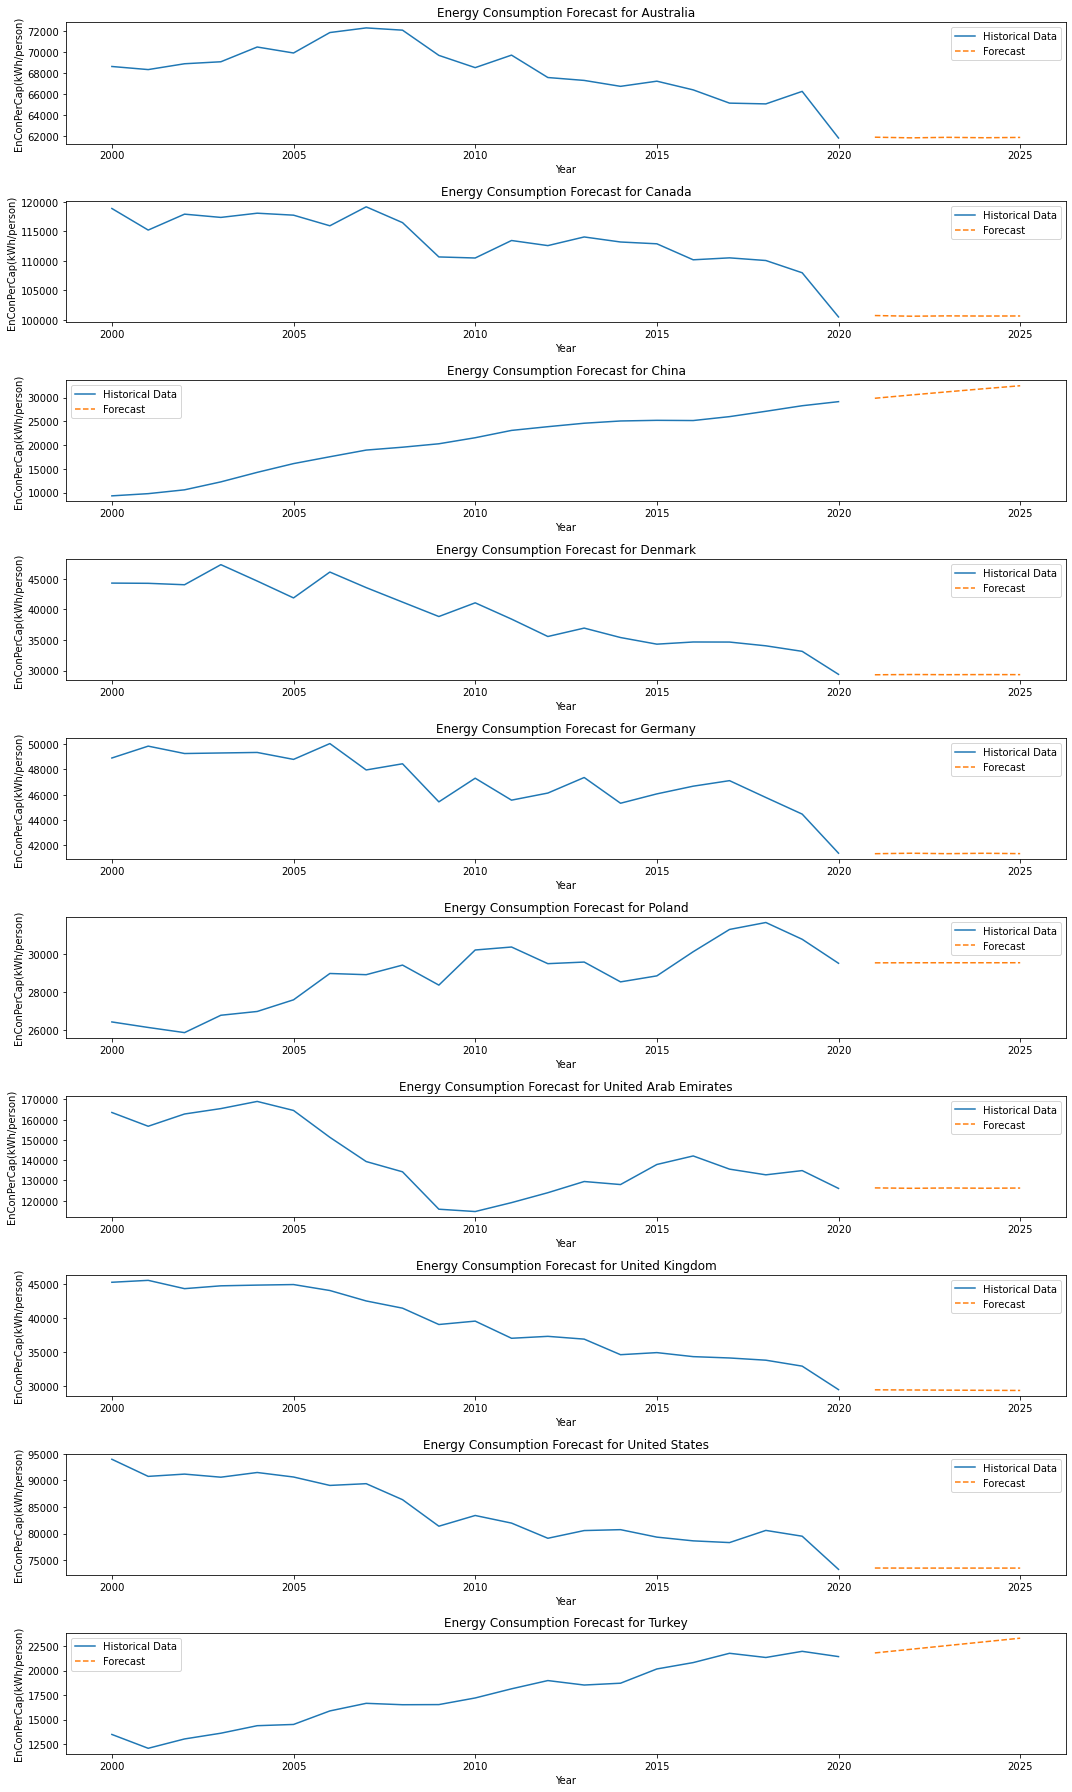

In [289]:
# Visualizing the forecasts along with the historical data

import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(15, 25))
selected_countries = ['Australia', 'Canada', 'China', 'Denmark', 'Germany', 'Poland', 
                      'United Arab Emirates', 'United Kingdom', 'United States', 'Turkey']

# Function to plot historical data and forecast
def plot_forecast(country, ax):
    country_data = filtered_data[filtered_data['Entity'] == country].sort_values('Year')
    years = country_data['Year']
    energy_consumption = country_data['Primary energy consumption per capita (kWh/person)']

    # Plot historical data
    ax.plot(years, energy_consumption, label='Historical Data')

    # Forecast data
    forecast_years = np.arange(2021, 2026)
    forecast = manual_results[country]['forecast']
    ax.plot(forecast_years, forecast, label='Forecast', linestyle='--')

    ax.set_title(f'Energy Consumption Forecast for {country}')
    ax.set_xlabel('Year')
    ax.set_ylabel('EnConPerCap(kWh/person)')
    ax.legend()

# Plot for each country
for i, country in enumerate(selected_countries):
    ax = plt.subplot(10, 1, i+1)
    plot_forecast(country, ax)

plt.tight_layout()
plt.show()


Using ACF to check for seasonality

<Figure size 720x360 with 0 Axes>

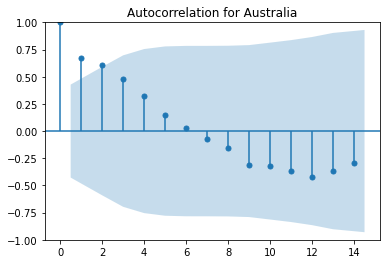

<Figure size 720x360 with 0 Axes>

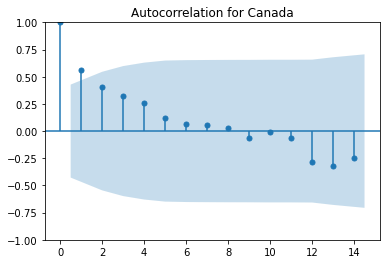

<Figure size 720x360 with 0 Axes>

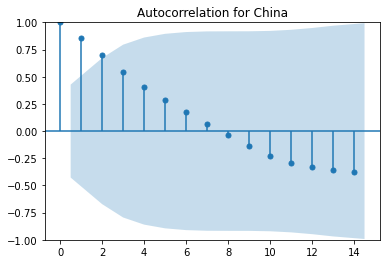

<Figure size 720x360 with 0 Axes>

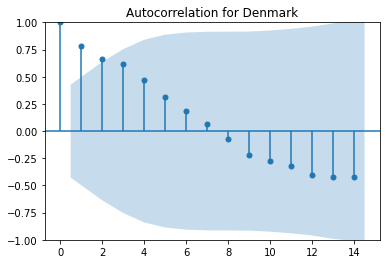

<Figure size 720x360 with 0 Axes>

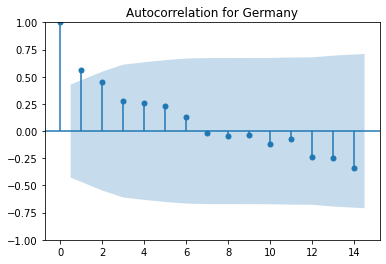

<Figure size 720x360 with 0 Axes>

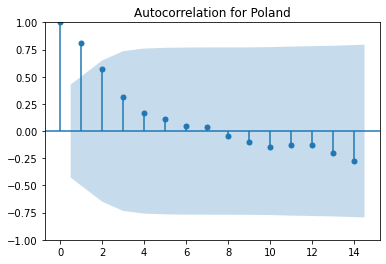

<Figure size 720x360 with 0 Axes>

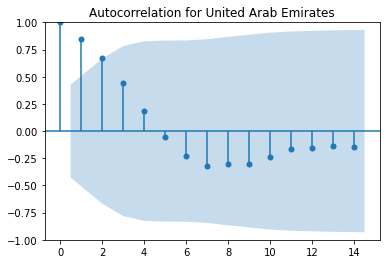

<Figure size 720x360 with 0 Axes>

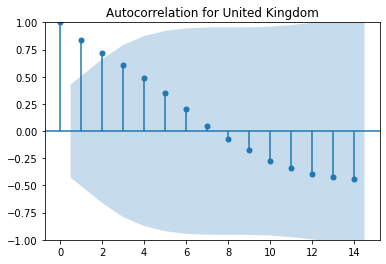

<Figure size 720x360 with 0 Axes>

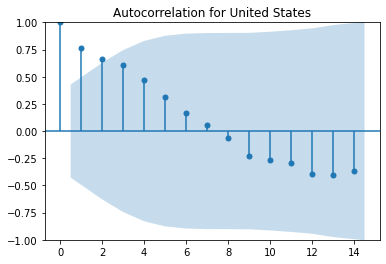

<Figure size 720x360 with 0 Axes>

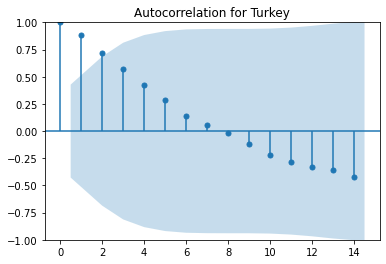

In [288]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Define selected countries and relevant columns
selected_countries = ['Australia', 'Canada', 'China', 'Denmark', 'Germany', 'Poland', 
                      'United Arab Emirates', 'United Kingdom', 'United States', 'Turkey']
relevant_columns = ['Entity', 'Year', 'Primary energy consumption per capita (kWh/person)']

# Filter data for the selected countries and relevant columns
filtered_data = df[df['Entity'].isin(selected_countries)][relevant_columns]

# Loop through each country to plot ACF
for country in selected_countries:
    # Filter data for the specific country and set the index to 'Year'
    country_data = filtered_data[filtered_data['Entity'] == country].set_index('Year')['Primary energy consumption per capita (kWh/person)']
    
    # Plot ACF to check for seasonality
    plt.figure(figsize=(10, 5))
    plot_acf(country_data)
    plt.title(f'Autocorrelation for {country}')
    plt.show()


There is no seasonality in the data

### ARIMA and Exponential Smoothing:

In [290]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# the list of countries
countries = ['Australia', 'Canada', 'China', 'Denmark', 'Germany', 'Poland', 
             'United Arab Emirates', 'United Kingdom', 'United States', 'Turkey']

# filtering the data for the selected countries
filtered_data = df[df['Entity'].isin(countries)]

# Function to manually fit an ARIMA model and forecast
def manual_arima_forecast(country_data, order=(1, 1, 1)):
    # Extract the energy consumption column
    energy_consumption = country_data['Primary energy consumption per capita (kWh/person)'].dropna()

    # Fit ARIMA model
    model = ARIMA(energy_consumption, order=order)
    model_fit = model.fit()

    # Forecast for the next 5 years (2021-2025)
    forecast = model_fit.forecast(steps=5)

    return forecast, model_fit

# Function to manually fit an Exponential Smoothing model and forecast
def manual_exponential_smoothing_forecast(country_data, trend='add', seasonal=None, seasonal_periods=None):
    # Extract the energy consumption column
    energy_consumption = country_data['Primary energy consumption per capita (kWh/person)'].dropna()

    # Fit Exponential Smoothing model
    model = ExponentialSmoothing(energy_consumption, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_periods)
    model_fit = model.fit()

    # Forecast for the next 5 years (2021-2025)
    forecast = model_fit.forecast(steps=5)

    return forecast, model_fit

# Forecasting for each country
manual_results = {}
for country in countries:
    country_data = filtered_data[filtered_data['Entity'] == country].sort_values('Year')
    
    # ARIMA forecast
    arima_forecast, arima_model_fit = manual_arima_forecast(country_data)
    
    # Exponential Smoothing forecast
    exp_smoothing_forecast, exp_smoothing_model_fit = manual_exponential_smoothing_forecast(country_data)
    
    manual_results[country] = {
        'arima_forecast': arima_forecast,
        'arima_model_summary': arima_model_fit.summary(),
        'exp_smoothing_forecast': exp_smoothing_forecast,
        'exp_smoothing_model_summary': exp_smoothing_model_fit.summary()
    }

# Display the forecasted values and model summary for each country
for country, result in manual_results.items():
    print(f"Forecast for {country}:")
    print("ARIMA Forecast:")
    print(result['arima_forecast'])
    print("ARIMA Model Summary:")
    print(result['arima_model_summary'])
    print("\nExponential Smoothing Forecast:")
    print(result['exp_smoothing_forecast'])
    print("Exponential Smoothing Model Summary:")
    print(result['exp_smoothing_model_summary'])
    print("\n" + "="*50 + "\n")


C:\Users\ASUS\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\ASUS\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g

Forecast for Australia:
ARIMA Forecast:
21    61903.434609
22    61842.880874
23    61890.362563
24    61853.130990
25    61882.325192
Name: predicted_mean, dtype: float64
ARIMA Model Summary:
                                               SARIMAX Results                                                
Dep. Variable:     Primary energy consumption per capita (kWh/person)   No. Observations:                   21
Model:                                                 ARIMA(1, 1, 1)   Log Likelihood                -174.185
Date:                                                Tue, 13 Aug 2024   AIC                            354.371
Time:                                                        16:11:44   BIC                            357.358
Sample:                                                             0   HQIC                           354.954
                                                                 - 21                                         
Covariance Type:              

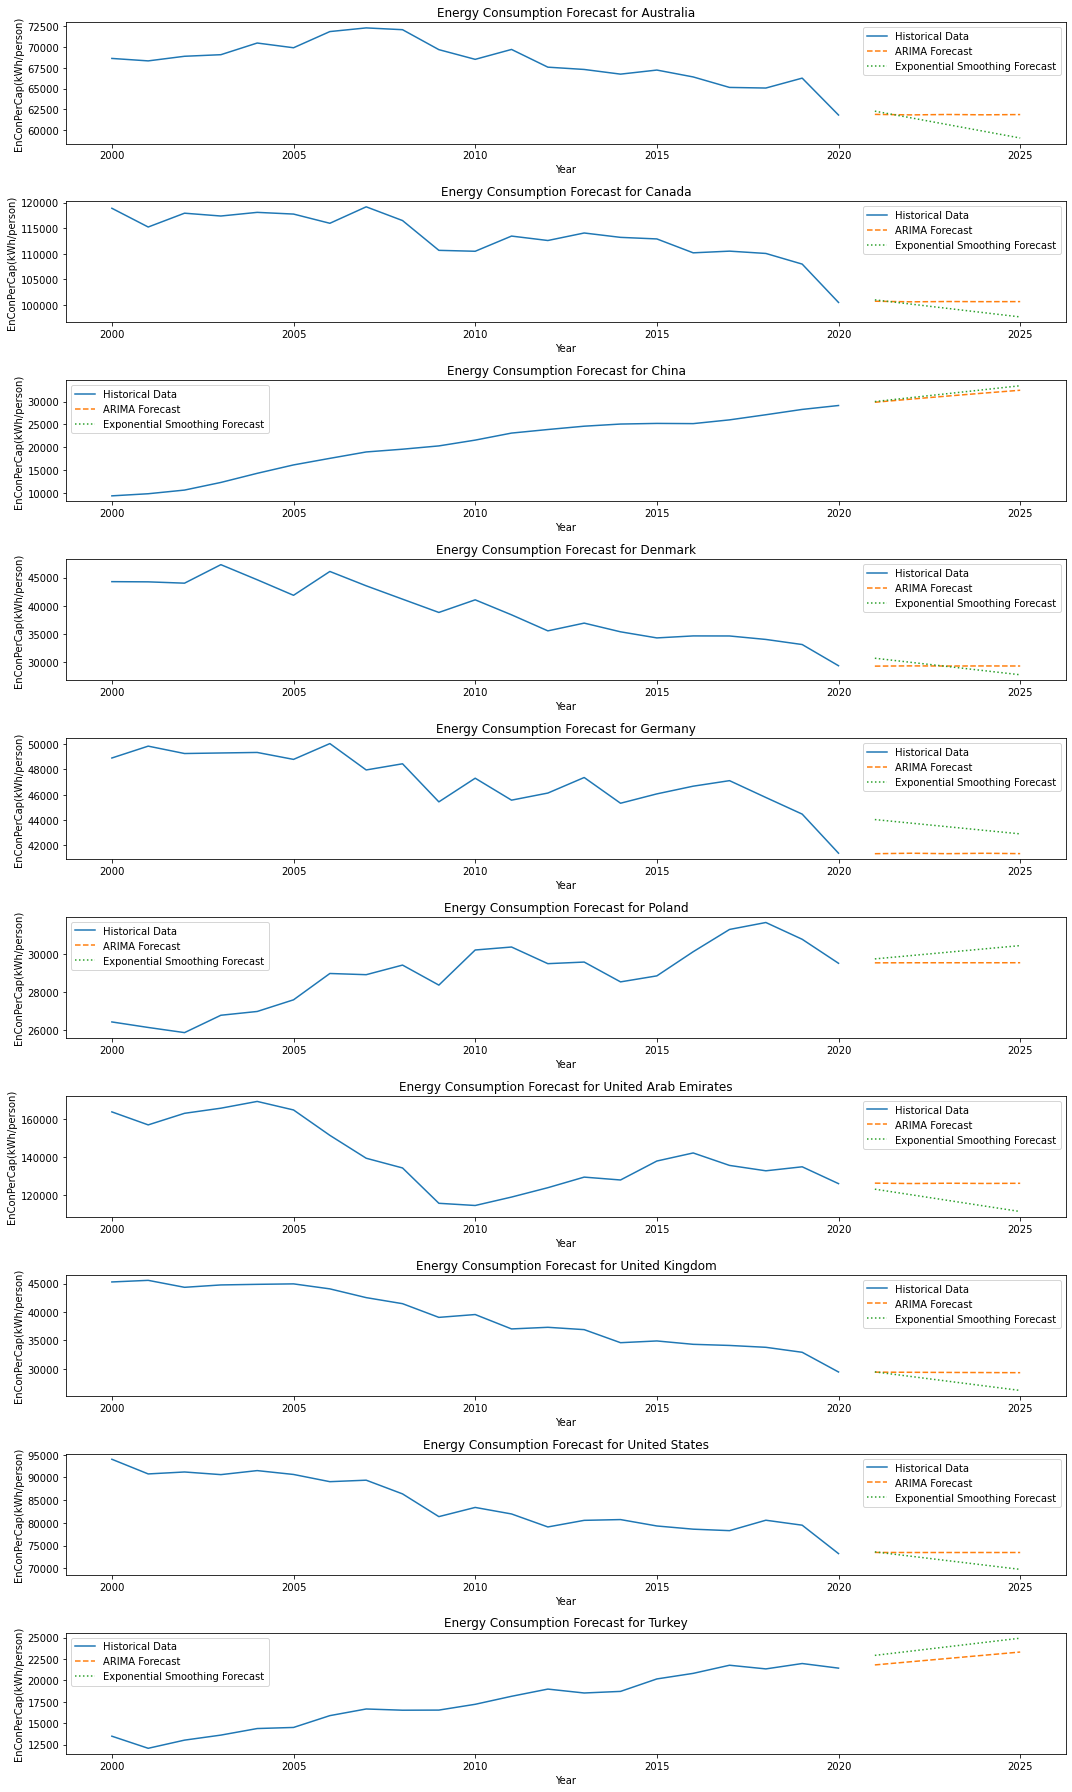

In [291]:
import matplotlib.pyplot as plt
import numpy as np

# Visualizing the forecasts along with the historical data
plt.figure(figsize=(15, 25))
selected_countries = ['Australia', 'Canada', 'China', 'Denmark', 'Germany', 'Poland', 
                      'United Arab Emirates', 'United Kingdom', 'United States', 'Turkey']

# Function to plot historical data and forecast
def plot_forecast(country, ax):
    country_data = filtered_data[filtered_data['Entity'] == country].sort_values('Year')
    years = country_data['Year']
    energy_consumption = country_data['Primary energy consumption per capita (kWh/person)']

    # Plot historical data
    ax.plot(years, energy_consumption, label='Historical Data')

    # Forecast data for ARIMA
    forecast_years = np.arange(2021, 2026)
    arima_forecast = manual_results[country]['arima_forecast']
    ax.plot(forecast_years, arima_forecast, label='ARIMA Forecast', linestyle='--')

    # Forecast data for Exponential Smoothing
    exp_smoothing_forecast = manual_results[country]['exp_smoothing_forecast']
    ax.plot(forecast_years, exp_smoothing_forecast, label='Exponential Smoothing Forecast', linestyle=':')

    ax.set_title(f'Energy Consumption Forecast for {country}')
    ax.set_xlabel('Year')
    ax.set_ylabel('EnConPerCap(kWh/person)')
    ax.legend()

# Plot for each country
for i, country in enumerate(selected_countries):
    ax = plt.subplot(10, 1, i+1)
    plot_forecast(country, ax)

plt.tight_layout()
plt.show()


### Including the Moving Average (MA) method along with ARIMA

C:\Users\ASUS\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\ASUS\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g

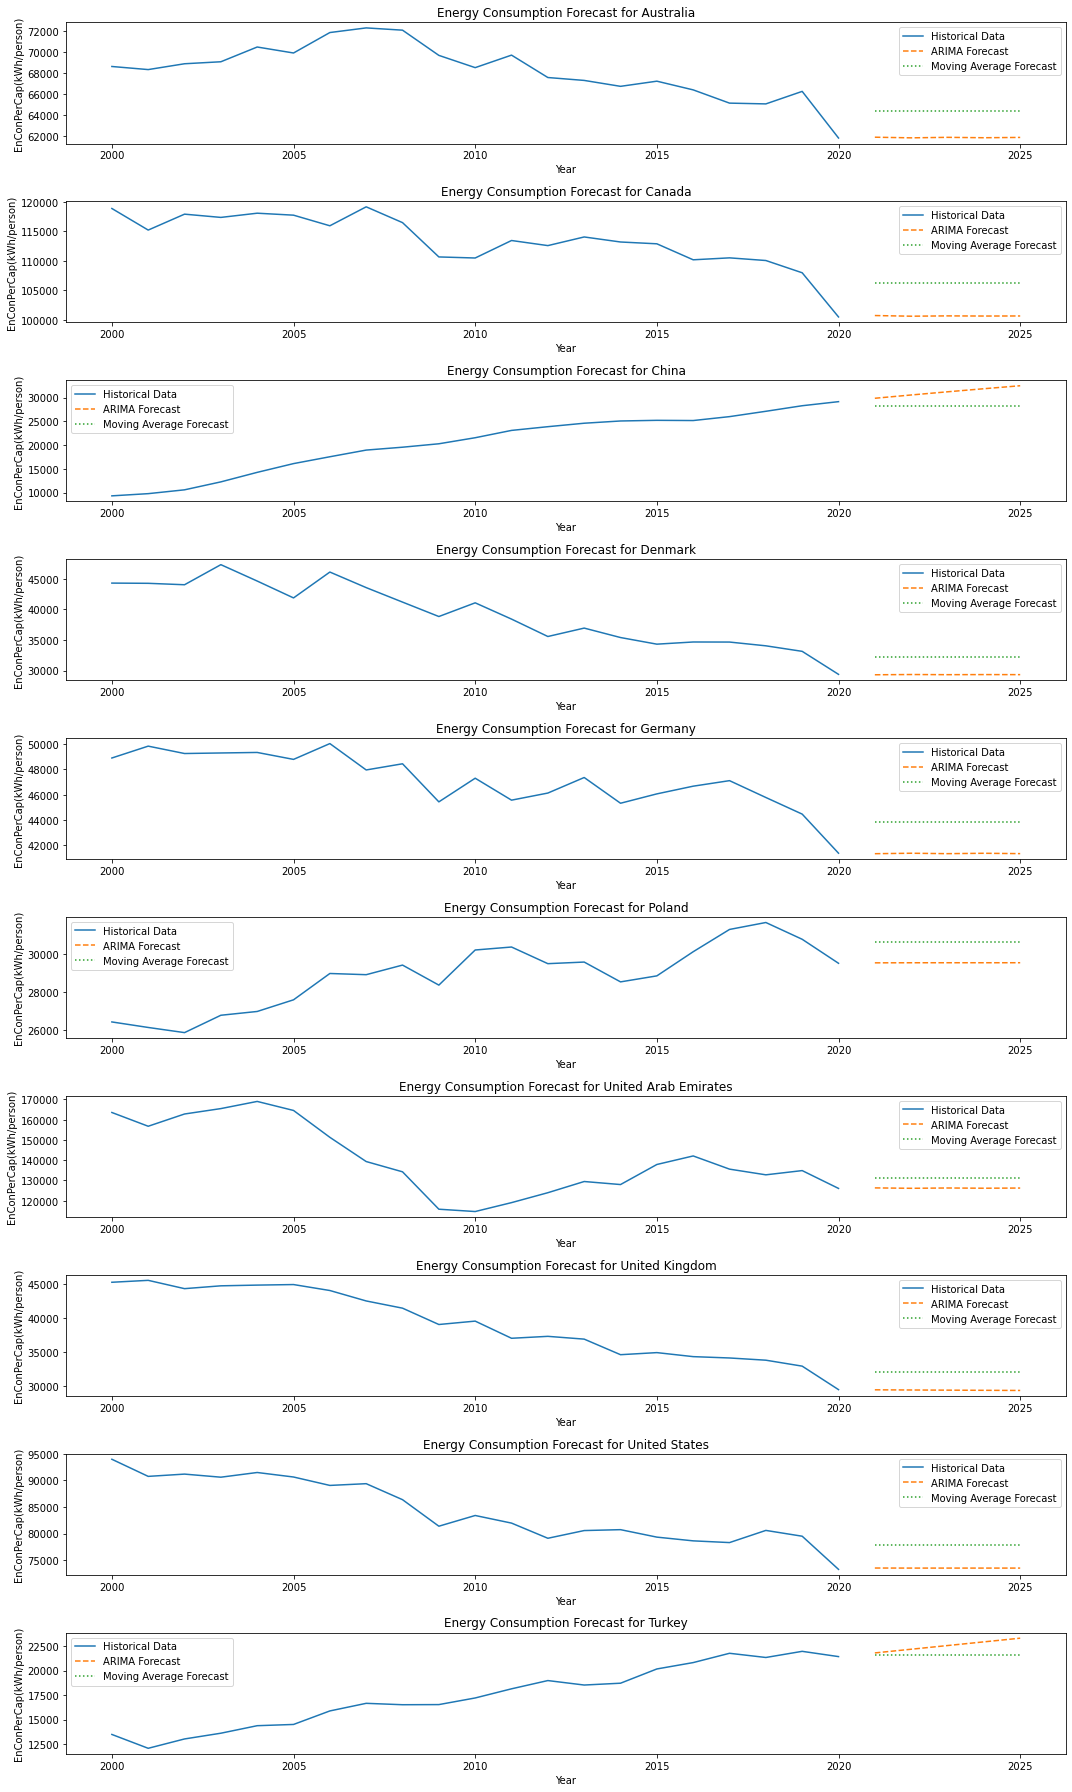

In [293]:
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

# the list of countries
selected_countries = ['Australia', 'Canada', 'China', 'Denmark', 'Germany', 'Poland', 
                      'United Arab Emirates', 'United Kingdom', 'United States', 'Turkey']

# filtering the data for the selected countries
filtered_data = df[df['Entity'].isin(selected_countries)]

# Function to manually fit an ARIMA model and forecast
def manual_arima_forecast(country_data, order=(1, 1, 1)):
    # Extract the energy consumption column
    energy_consumption = country_data['Primary energy consumption per capita (kWh/person)'].dropna()

    # Fit ARIMA model
    model = ARIMA(energy_consumption, order=order)
    model_fit = model.fit()

    # Forecast for the next 5 years (2021-2025)
    forecast = model_fit.forecast(steps=5)

    return forecast, model_fit

# Function to forecast using Moving Average (MA)
def moving_average_forecast(country_data, window=3):
    energy_consumption = country_data['Primary energy consumption per capita (kWh/person)'].dropna()
    ma_model_fit = energy_consumption.rolling(window=window).mean().iloc[-1]

    # Extend the last moving average value as the forecast
    ma_forecast = np.full(5, ma_model_fit)
    
    return ma_forecast

# Forecasting for each country
manual_results = {}
for country in selected_countries:
    country_data = filtered_data[filtered_data['Entity'] == country].sort_values('Year')
    
    # ARIMA forecast
    arima_forecast, arima_model_fit = manual_arima_forecast(country_data)
    
    # Moving Average forecast
    ma_forecast = moving_average_forecast(country_data)
    
    manual_results[country] = {
        'arima_forecast': arima_forecast,
        'arima_model_summary': arima_model_fit.summary(),
        'ma_forecast': ma_forecast
    }

# Visualizing the forecasts along with the historical data
plt.figure(figsize=(15, 25))

# Function to plot historical data and forecasts
def plot_forecast(country, ax):
    country_data = filtered_data[filtered_data['Entity'] == country].sort_values('Year')
    years = country_data['Year']
    energy_consumption = country_data['Primary energy consumption per capita (kWh/person)']

    # Plot historical data
    ax.plot(years, energy_consumption, label='Historical Data')

    # Forecast data for ARIMA
    forecast_years = np.arange(2021, 2026)
    arima_forecast = manual_results[country]['arima_forecast']
    ax.plot(forecast_years, arima_forecast, label='ARIMA Forecast', linestyle='--')

    # Moving Average (MA) Forecast
    ma_forecast = manual_results[country]['ma_forecast']
    ax.plot(forecast_years, ma_forecast, label='Moving Average Forecast', linestyle=':')

    ax.set_title(f'Energy Consumption Forecast for {country}')
    ax.set_xlabel('Year')
    ax.set_ylabel('EnConPerCap(kWh/person)')
    ax.legend()

# Plot for each country
for i, country in enumerate(selected_countries):
    ax = plt.subplot(10, 1, i+1)
    plot_forecast(country, ax)

plt.tight_layout()
plt.show()


### Future carbon emission

C:\Users\ASUS\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\ASUS\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g

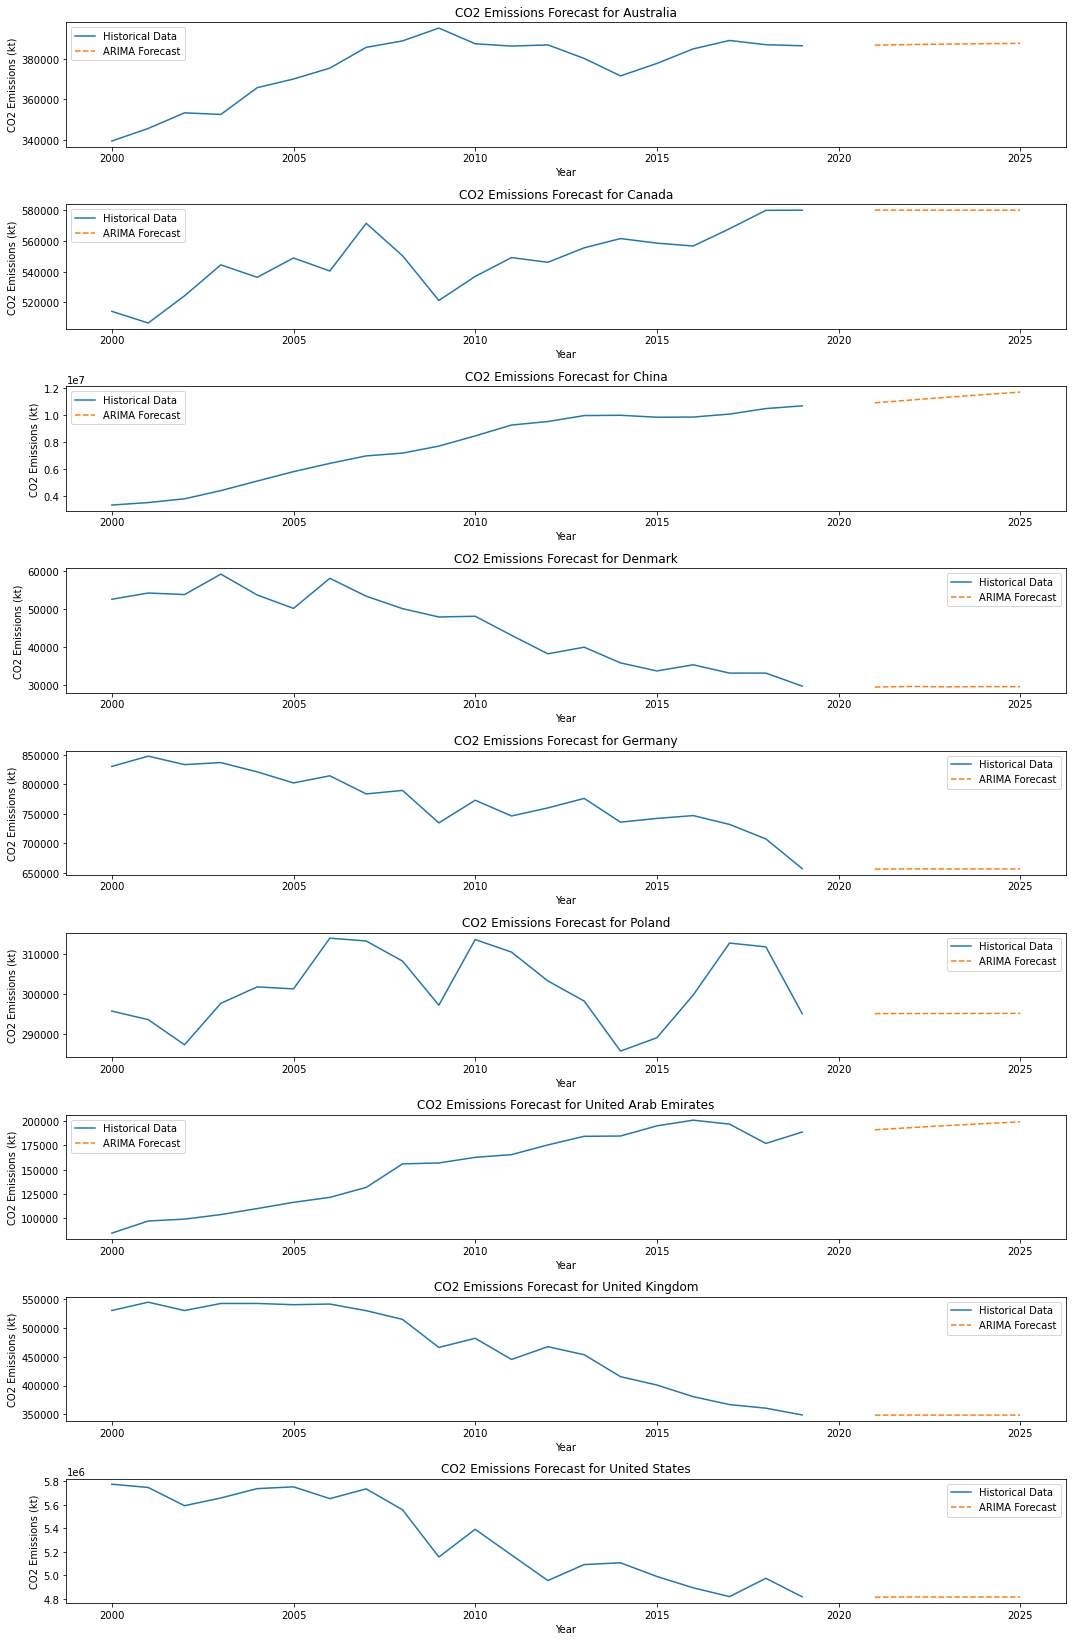

In [297]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Assuming the dataset is already loaded into df

# Defining the countries for CO2 emissions forecasting
selected_countries = ['Australia', 'Canada', 'China', 'Denmark', 'Germany', 'Poland', 
                      'United Arab Emirates', 'United Kingdom', 'United States', 'Turkey']

# Filtering the data for the selected countries
filtered_data = df[df['Entity'].isin(selected_countries)]

# Function to fit ARIMA model and forecast for CO2 Emissions
def manual_arima_forecast_co2(country_data, order=(1, 1, 1)):
    # Extract the CO2 Emissions column
    co2_emissions = country_data['Value_co2_emissions_kt_by_country'].dropna()

    # Check if the data is not empty
    if len(co2_emissions) == 0:
        return None, None

    # Fit ARIMA model
    model = ARIMA(co2_emissions, order=order)
    model_fit = model.fit()

    # Forecast for the next 5 years (2021-2025)
    forecast = model_fit.forecast(steps=5)

    return forecast, model_fit

# Forecasting CO2 Emissions for each country
manual_results_co2 = {}
for country in selected_countries:
    country_data = filtered_data[filtered_data['Entity'] == country].sort_values('Year')
    forecast, model_fit = manual_arima_forecast_co2(country_data)
    
    if forecast is not None:
        manual_results_co2[country] = {
            'forecast': forecast,
            'model_summary': model_fit.summary()
        }

# Visualizing the CO2 Emissions forecasts along with the historical data
plt.figure(figsize=(15, 25))

# Function to plot CO2 Emissions historical data and forecast
def plot_forecast_co2(country, ax):
    country_data = filtered_data[filtered_data['Entity'] == country].sort_values('Year')
    years = country_data['Year']
    co2_emissions = country_data['Value_co2_emissions_kt_by_country']

    # Plot historical data
    ax.plot(years, co2_emissions, label='Historical Data')

    # Forecast data
    forecast_years = np.arange(2021, 2026)
    forecast = manual_results_co2[country]['forecast']

    ax.plot(forecast_years, forecast, label='ARIMA Forecast', linestyle='--')

    ax.set_title(f'CO2 Emissions Forecast for {country}')
    ax.set_xlabel('Year')
    ax.set_ylabel('CO2 Emissions (kt)')
    ax.legend()

# Plot for each country
for i, country in enumerate(selected_countries):
    if country in manual_results_co2:
        ax = plt.subplot(len(selected_countries), 1, i+1)
        plot_forecast_co2(country, ax)

plt.tight_layout()
plt.show()


### Including ARIMA and Exponential smoothing

C:\Users\ASUS\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\ASUS\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g

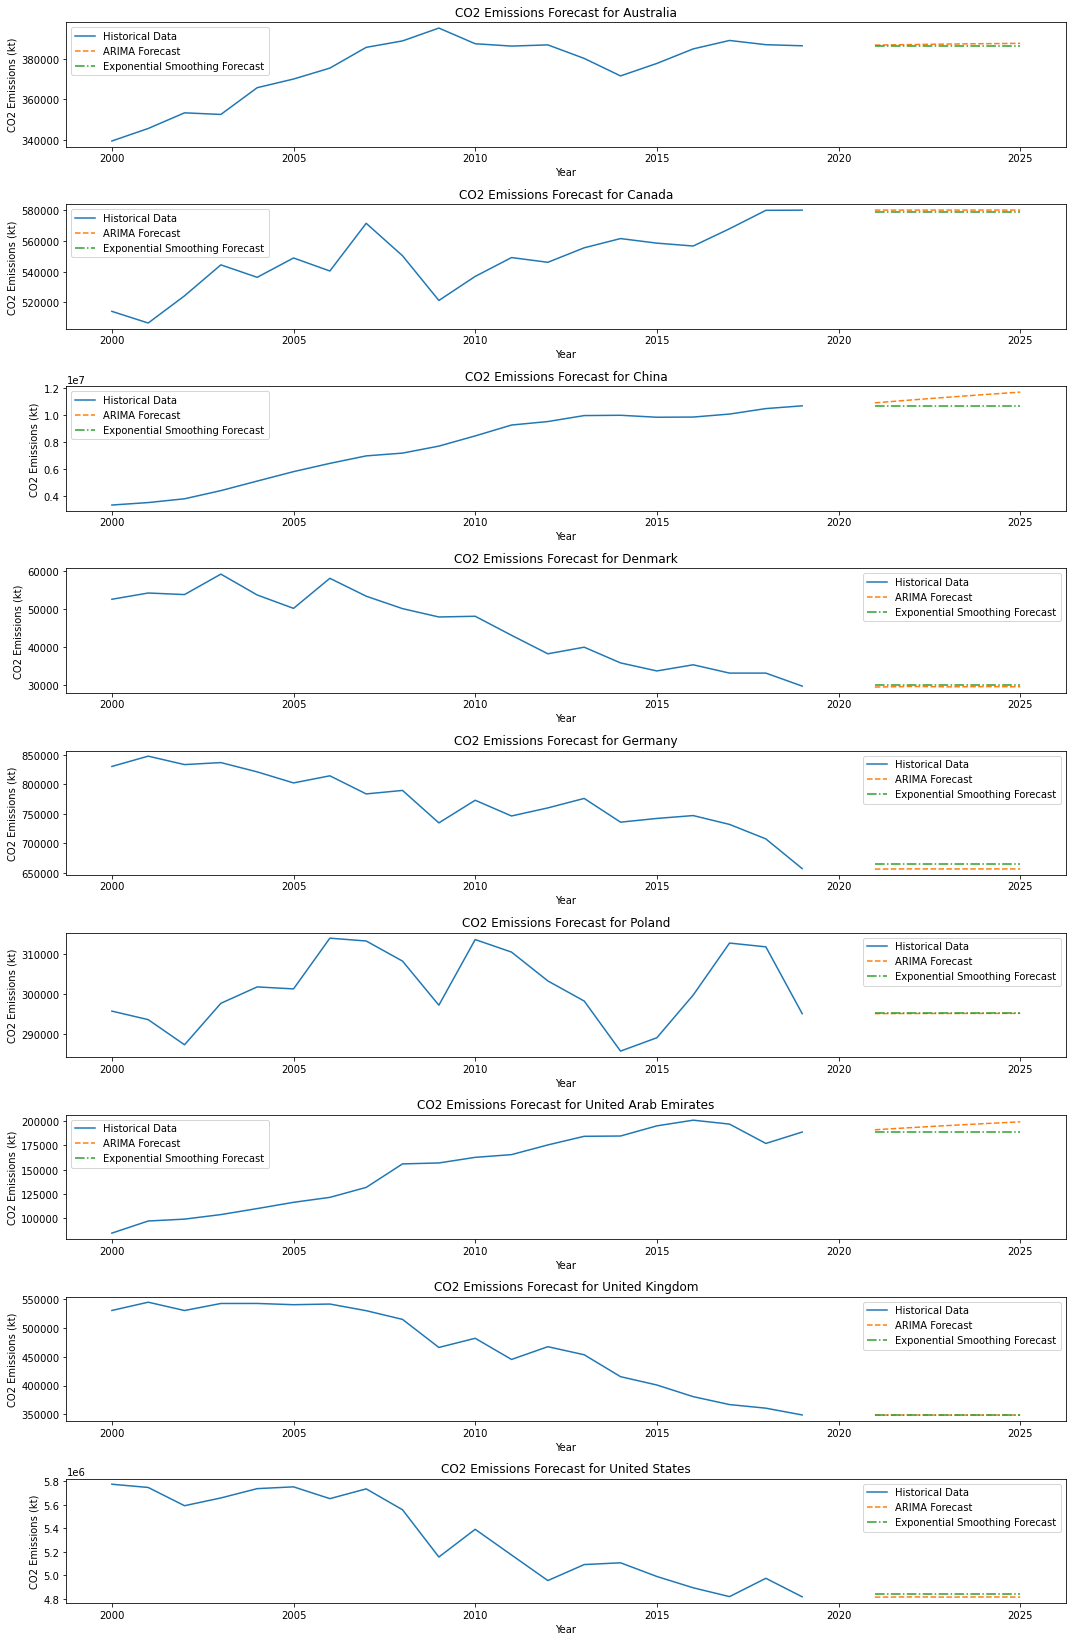

In [299]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Assuming the dataset is already loaded into df

# Defining the countries for forecasting
selected_countries = ['Australia', 'Canada', 'China', 'Denmark', 'Germany', 'Poland', 
                      'United Arab Emirates', 'United Kingdom', 'United States', 'Turkey']

# Filtering the data for the selected countries
filtered_data = df[df['Entity'].isin(selected_countries)]

# Function to fit ARIMA model and forecast
def manual_arima_forecast(country_data, order=(1, 1, 1)):
    co2_emissions = country_data['Value_co2_emissions_kt_by_country'].dropna()

    if len(co2_emissions) == 0:
        return None, None

    model = ARIMA(co2_emissions, order=order)
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=5)

    return forecast, model_fit

# Function to fit Exponential Smoothing model and forecast (simple, without seasonality)
def manual_exp_smoothing_forecast(country_data):
    co2_emissions = country_data['Value_co2_emissions_kt_by_country'].dropna()

    if len(co2_emissions) == 0:
        return None, None

    model = ExponentialSmoothing(co2_emissions, trend=None, seasonal=None)
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=5)

    return forecast, model_fit

# Forecasting CO2 Emissions for each country
manual_results = {}
for country in selected_countries:
    country_data = filtered_data[filtered_data['Entity'] == country].sort_values('Year')
    
    # ARIMA Forecast
    arima_forecast, arima_model_fit = manual_arima_forecast(country_data)
    
    # Exponential Smoothing Forecast
    exp_smoothing_forecast, exp_smoothing_model_fit = manual_exp_smoothing_forecast(country_data)

    if arima_forecast is not None and exp_smoothing_forecast is not None:
        manual_results[country] = {
            'arima_forecast': arima_forecast,
            'exp_smoothing_forecast': exp_smoothing_forecast,
            'arima_model_summary': arima_model_fit.summary(),
            'exp_smoothing_model_summary': exp_smoothing_model_fit.summary()
        }

# Visualizing the CO2 Emissions forecasts along with the historical data
plt.figure(figsize=(15, 25))

def plot_forecast(country, ax):
    country_data = filtered_data[filtered_data['Entity'] == country].sort_values('Year')
    years = country_data['Year']
    co2_emissions = country_data['Value_co2_emissions_kt_by_country']

    # Plot historical data
    ax.plot(years, co2_emissions, label='Historical Data')

    # Forecast data
    forecast_years = np.arange(2021, 2026)
    arima_forecast = manual_results[country]['arima_forecast']
    exp_smoothing_forecast = manual_results[country]['exp_smoothing_forecast']

    if arima_forecast is not None:
        ax.plot(forecast_years, arima_forecast, label='ARIMA Forecast', linestyle='--')
    if exp_smoothing_forecast is not None:
        ax.plot(forecast_years, exp_smoothing_forecast, label='Exponential Smoothing Forecast', linestyle='-.')

    ax.set_title(f'CO2 Emissions Forecast for {country}')
    ax.set_xlabel('Year')
    ax.set_ylabel('CO2 Emissions (kt)')
    ax.legend()

# Plot for each country
for i, country in enumerate(selected_countries):
    if country in manual_results:
        ax = plt.subplot(len(selected_countries), 1, i+1)
        plot_forecast(country, ax)

plt.tight_layout()
plt.show()


### Including ARIMA and Moving Average

C:\Users\ASUS\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\ASUS\AppData\Local\Temp\ipykernel_22188\3750010401.py:49: FutureWarning: The series.append method is deprecated and will be removed from pandas in 

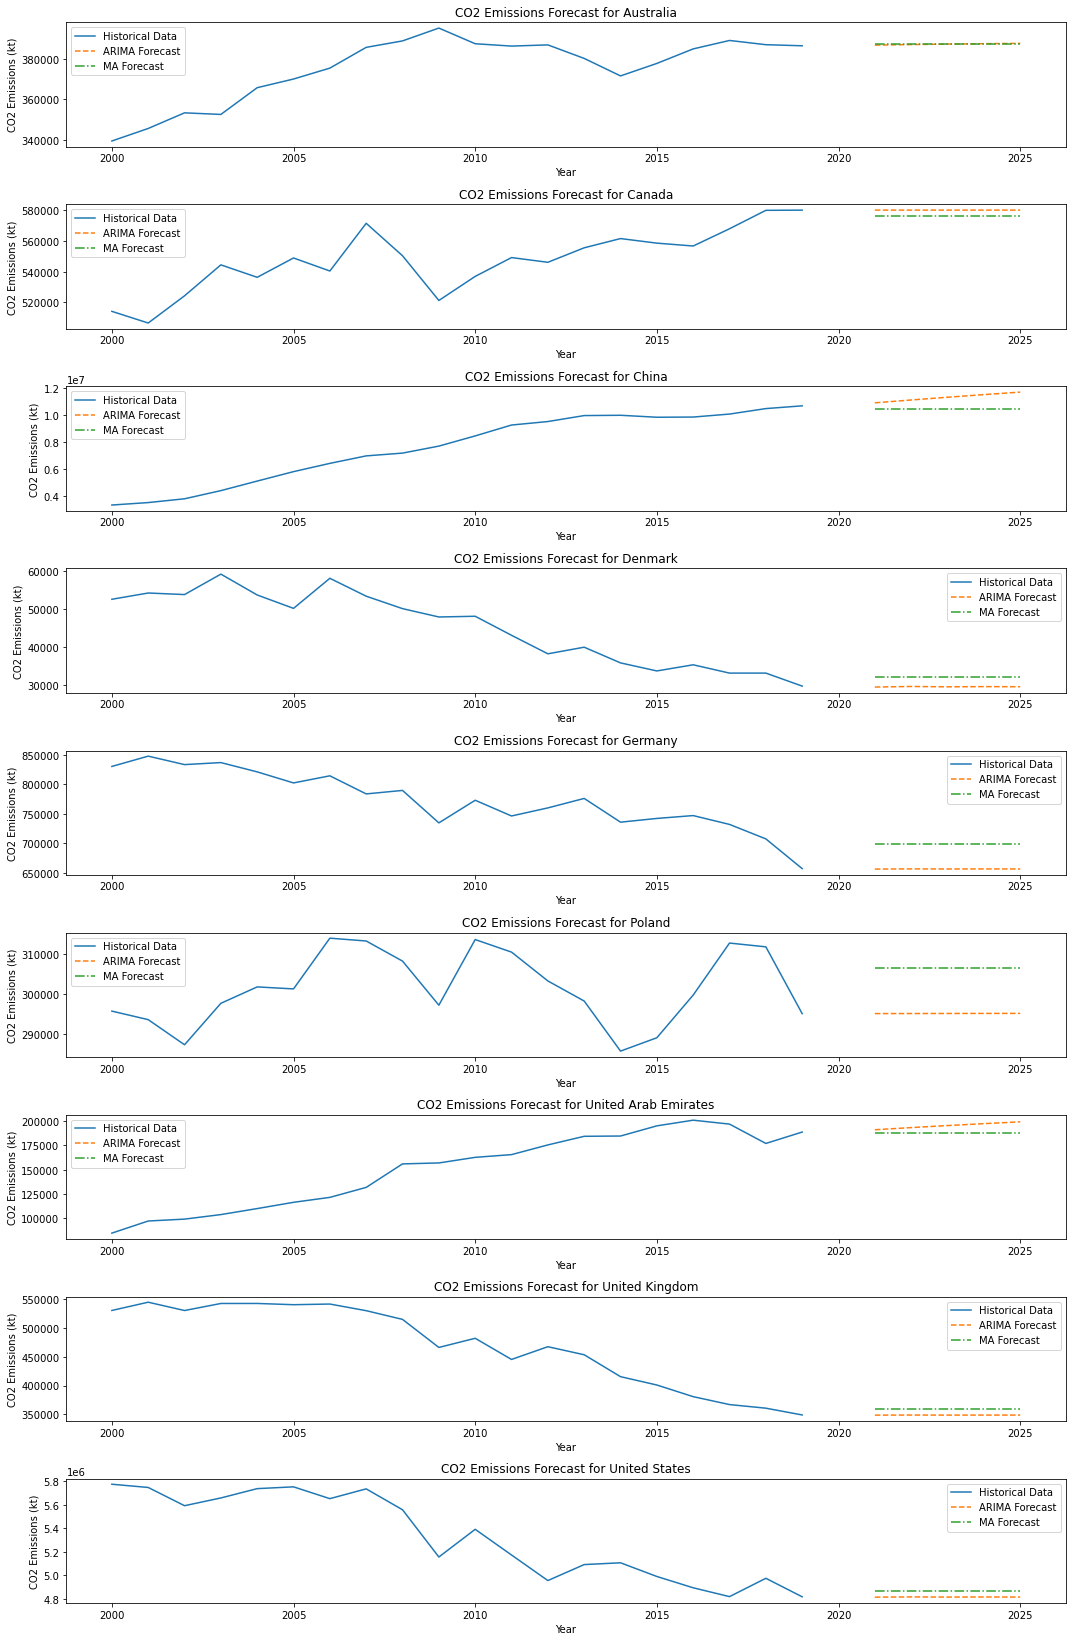

In [296]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Assuming the dataset is already loaded into df

# Defining the countries for CO2 emissions forecasting
selected_countries = ['Australia', 'Canada', 'China', 'Denmark', 'Germany', 'Poland', 
                      'United Arab Emirates', 'United Kingdom', 'United States', 'Turkey']

# Filtering the data for the selected countries
filtered_data = df[df['Entity'].isin(selected_countries)]

# Function to fit ARIMA model and forecast for CO2 Emissions
def manual_arima_forecast_co2(country_data, order=(1, 1, 1)):
    # Extract the CO2 Emissions column
    co2_emissions = country_data['Value_co2_emissions_kt_by_country'].dropna()

    # Check if the data is not empty
    if len(co2_emissions) == 0:
        return None, None

    # Fit ARIMA model
    model = ARIMA(co2_emissions, order=order)
    model_fit = model.fit()

    # Forecast for the next 5 years (2021-2025)
    forecast = model_fit.forecast(steps=5)

    return forecast, model_fit

# Function to calculate Moving Average
def moving_average_forecast(co2_emissions, window=3):
    return co2_emissions.rolling(window=window).mean().iloc[-1]

# Forecasting CO2 Emissions for each country
manual_results_co2 = {}
for country in selected_countries:
    country_data = filtered_data[filtered_data['Entity'] == country].sort_values('Year')
    forecast, model_fit = manual_arima_forecast_co2(country_data)
    
    if forecast is not None:
        # Calculate Moving Average forecast
        ma_forecast = []
        for i in range(5):  # Forecasting for the next 5 years
            last_known_year = country_data['Value_co2_emissions_kt_by_country'].dropna()
            ma_forecast.append(moving_average_forecast(last_known_year))
            last_known_year = last_known_year.append(pd.Series(ma_forecast[-1]))

        manual_results_co2[country] = {
            'forecast': forecast,
            'ma_forecast': ma_forecast,
            'model_summary': model_fit.summary()
        }

# Visualizing the CO2 Emissions forecasts along with the historical data
plt.figure(figsize=(15, 25))

# Function to plot CO2 Emissions historical data and forecast
def plot_forecast_co2(country, ax):
    country_data = filtered_data[filtered_data['Entity'] == country].sort_values('Year')
    years = country_data['Year']
    co2_emissions = country_data['Value_co2_emissions_kt_by_country']

    # Plot historical data
    ax.plot(years, co2_emissions, label='Historical Data')

    # Forecast data
    forecast_years = np.arange(2021, 2026)
    forecast = manual_results_co2[country]['forecast']
    ma_forecast = manual_results_co2[country]['ma_forecast']

    ax.plot(forecast_years, forecast, label='ARIMA Forecast', linestyle='--')
    ax.plot(forecast_years, ma_forecast, label='MA Forecast', linestyle='-.')

    ax.set_title(f'CO2 Emissions Forecast for {country}')
    ax.set_xlabel('Year')
    ax.set_ylabel('CO2 Emissions (kt)')
    ax.legend()

# Plot for each country
for i, country in enumerate(selected_countries):
    if country in manual_results_co2:
        ax = plt.subplot(len(selected_countries), 1, i+1)
        plot_forecast_co2(country, ax)

plt.tight_layout()
plt.show()


ACF to check for seasonality

C:\Users\ASUS\anaconda\lib\site-packages\matplotlib\axes\_base.py:2475: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


<Figure size 720x360 with 0 Axes>

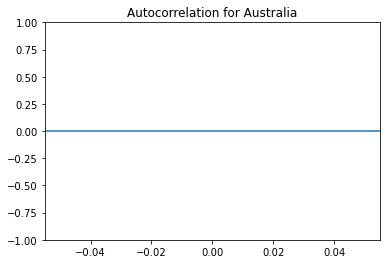

C:\Users\ASUS\anaconda\lib\site-packages\matplotlib\axes\_base.py:2475: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


<Figure size 720x360 with 0 Axes>

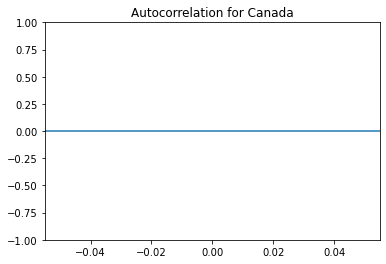

C:\Users\ASUS\anaconda\lib\site-packages\matplotlib\axes\_base.py:2475: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


<Figure size 720x360 with 0 Axes>

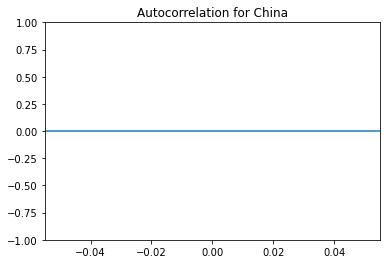

C:\Users\ASUS\anaconda\lib\site-packages\matplotlib\axes\_base.py:2475: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


<Figure size 720x360 with 0 Axes>

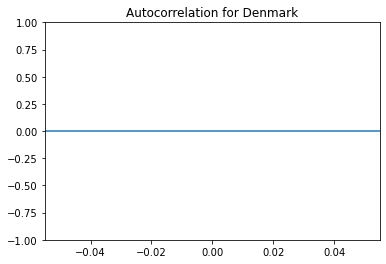

C:\Users\ASUS\anaconda\lib\site-packages\matplotlib\axes\_base.py:2475: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


<Figure size 720x360 with 0 Axes>

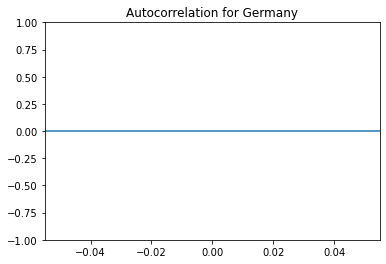

C:\Users\ASUS\anaconda\lib\site-packages\matplotlib\axes\_base.py:2475: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


<Figure size 720x360 with 0 Axes>

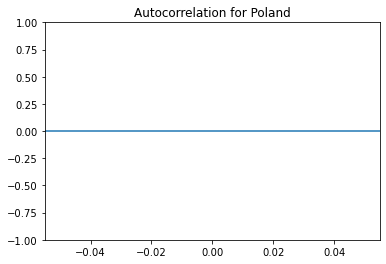

C:\Users\ASUS\anaconda\lib\site-packages\matplotlib\axes\_base.py:2475: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


<Figure size 720x360 with 0 Axes>

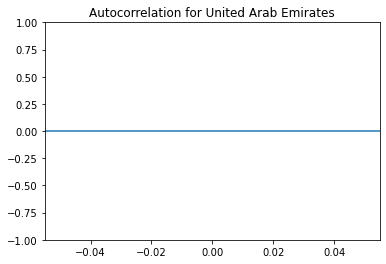

C:\Users\ASUS\anaconda\lib\site-packages\matplotlib\axes\_base.py:2475: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


<Figure size 720x360 with 0 Axes>

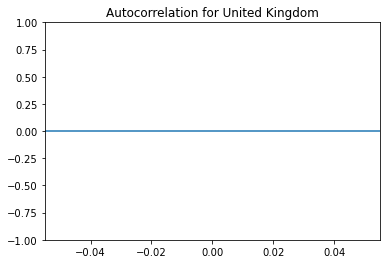

C:\Users\ASUS\anaconda\lib\site-packages\matplotlib\axes\_base.py:2475: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


<Figure size 720x360 with 0 Axes>

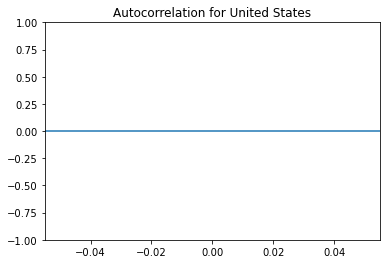

C:\Users\ASUS\anaconda\lib\site-packages\matplotlib\axes\_base.py:2475: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


<Figure size 720x360 with 0 Axes>

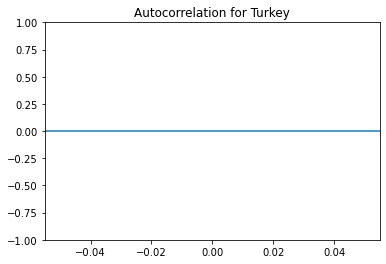

In [301]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Define selected countries and relevant columns
selected_countries = ['Australia', 'Canada', 'China', 'Denmark', 'Germany', 'Poland', 
                      'United Arab Emirates', 'United Kingdom', 'United States', 'Turkey']
relevant_columns = ['Entity', 'Year', 'Value_co2_emissions_kt_by_country']

# Filter data for the selected countries and relevant columns
filtered_data = df[df['Entity'].isin(selected_countries)][relevant_columns]

# Loop through each country to plot ACF
for country in selected_countries:
    # Filter data for the specific country and set the index to 'Year'
    country_data = filtered_data[filtered_data['Entity'] == country].set_index('Year')['Value_co2_emissions_kt_by_country']
    
    # Plot ACF to check for seasonality
    plt.figure(figsize=(10, 5))
    plot_acf(country_data)
    plt.title(f'Autocorrelation for {country}')
    plt.show()


There is no seasonality